In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('/content/gameandgrade.csv')

In [91]:
df.head(5)

,Sex,School Code,Playing Years,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,Playing Often_1,Playing Often_2,Playing Often_3,Playing Often_4,Playing Often_5,Cluster
0,0,1,1,1,1,4,4,5,77.5,False,True,False,False,False,2
1,1,1,1,1,1,1,3,3,83.0,False,False,True,False,False,2
2,0,1,0,0,0,1,3,3,80.0,False,False,False,False,False,1
3,0,1,3,1,1,2,2,3,45.0,False,False,False,False,True,2
4,1,1,1,2,1,1,3,4,85.0,True,False,False,False,False,2


# 100 Real-World Questions for Data Analysis

## Basic Data Exploration

### 1. What is the shape of the dataset?


In [66]:
df.shape

(769, 15)

### 2. What are the column names and their data types?


In [67]:
df.dtypes

,0
Sex,int64
School Code,int64
Playing Years,int64
Playing Hours,int64
Playing Games,int64
Parent Revenue,int64
Father Education,int64
Mother Education,int64
Grade,float64
Playing Often_1,bool


### 3. Are there any missing values in the dataset?


In [68]:
df.isnull().sum()

,0
Sex,0
School Code,0
Playing Years,0
Playing Hours,0
Playing Games,0
Parent Revenue,0
Father Education,0
Mother Education,0
Grade,0
Playing Often_1,0


### 4. What is the summary (mean, median, min, max) of numerical columns?


In [69]:
df.describe()

,Sex,School Code,Playing Years,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,Cluster
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,0.499350,4.945384,1.586476,1.490247,0.707412,1.837451,3.717815,3.409623,77.500039,1.315995
std,0.500325,3.001672,1.407060,1.337644,0.458098,1.064753,1.172474,1.177020,16.513588,0.779133
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,65.000000,1.000000
50%,0.000000,4.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,80.000000,2.000000
75%,1.000000,8.000000,3.000000,2.000000,1.000000,2.000000,5.000000,4.000000,90.000000,2.000000
max,1.000000,11.000000,4.000000,5.000000,2.000000,4.000000,6.000000,6.000000,100.000000,2.000000


### 5. How many unique values are there in each categorical column?


In [70]:
for col in df.select_dtypes(include=['object']).columns:
  print(f'{col}: {df[col].nunique()}')

### 6. What is the distribution of the 'Grade' column?


In [71]:
df['Grade'].describe()

,Grade
count,769.000000
mean,77.500039
std,16.513588
min,33.000000
25%,65.000000
50%,80.000000
75%,90.000000
max,100.000000


### 7. What is the correlation matrix of numerical variables?


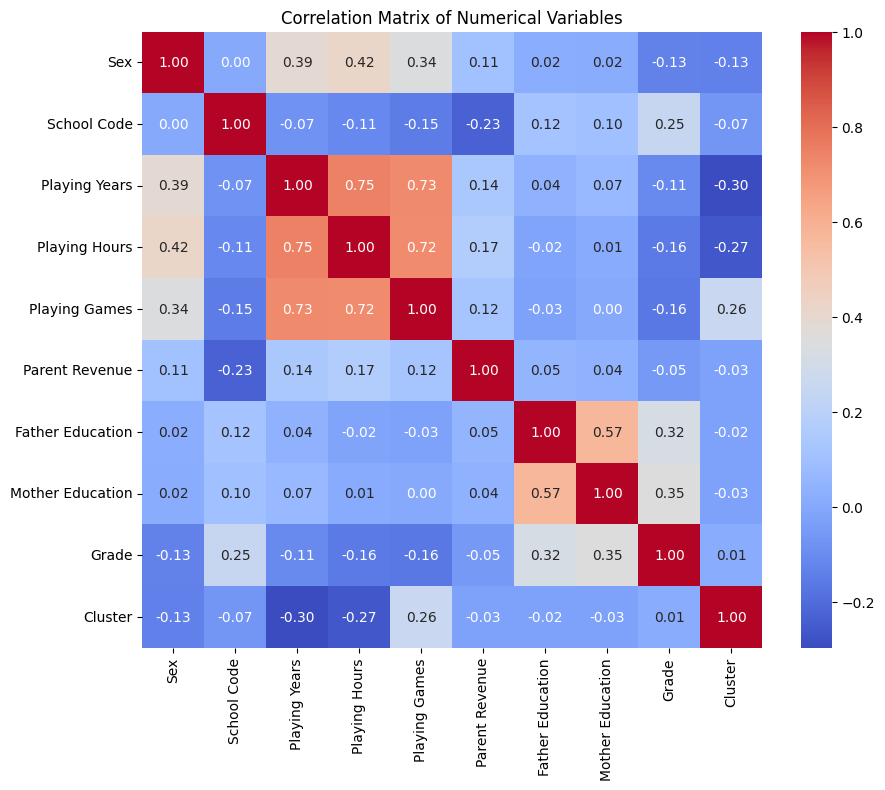

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix only for numerical columns
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### 8. Are there any outliers in the dataset?


In [73]:
import pandas as pd
import numpy as np

def find_outliers_iqr(data, column):
  """
  Identifies outliers in a given column using the IQR method.

  Args:
    data: The pandas DataFrame containing the data.
    column: The name of the column to analyze.

  Returns:
    A pandas Series containing the outlier values.
  """
  # Convert the column to numeric, if possible. Errors='coerce' will turn non-numeric values into NaN.
  data[column] = pd.to_numeric(data[column], errors='coerce')

  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
  return outliers

# Assuming your DataFrame is named 'df'
# Replace 'Grade' and 'Playing Hours' with the actual numerical columns you want to check
for column in ['Grade', 'Playing Hours', 'Playing Years', 'Parent Revenue']:
    outliers = find_outliers_iqr(df, column)
    if len(outliers) > 0:
        print(f"Outliers in '{column}':\n{outliers}\n")
    else:
        print(f"No outliers found in '{column}'.\n")

No outliers found in 'Grade'.

No outliers found in 'Playing Hours'.

No outliers found in 'Playing Years'.

Outliers in 'Parent Revenue':
0      4
20     4
72     4
74     4
101    4
153    4
175    4
177    4
194    4
207    4
273    4
282    4
295    4
309    4
346    4
356    4
376    4
377    4
388    4
392    4
394    4
399    4
401    4
403    4
406    4
407    4
414    4
418    4
421    4
422    4
423    4
424    4
425    4
428    4
429    4
432    4
434    4
438    4
439    4
441    4
534    4
544    4
577    4
654    4
663    4
667    4
710    4
724    4
741    4
767    4
Name: Parent Revenue, dtype: int64



### 9. What are the unique values in the 'Sex' column?


In [74]:
df['Sex'].unique()

array([0, 1])

### 10. What is the frequency count of each unique value in the 'Sex' column?


In [75]:
df['Sex'].value_counts()

,count
Sex,
0,385
1,384


## Grouping and Aggregation

### 11. What is the average 'Grade' for each 'School Code'?


In [76]:
df.groupby('School Code')['Grade'].mean()

,Grade
School Code,
1,72.658929
2,72.708962
3,69.675758
4,73.052993
5,93.367647
6,96.190476
7,96.829268
8,75.216857
9,95.270000


### 12. What is the mean 'Playing Hours' per 'Playing Often' category?


In [93]:
df.groupby('Playing Often')['Playing Hours'].mean()

,Playing Hours
Playing Often,
0,0.000000
1,2.808696
2,1.833333
3,2.053571
4,1.863636
5,1.903846


### 13. What is the total 'Playing Hours' per 'Playing Games' category?


In [ ]:
df.groupby('Playing Games')['Playing Hours'].sum()

### 14. What is the maximum 'Grade' achieved for each level of 'Father Education'?


In [ ]:
df.groupby('Father Education')['Grade'].max()

### 15. How does 'Grade' vary with 'Mother Education'?


In [ ]:
df.groupby('Mother Education')['Grade'].agg(['mean', 'median', 'min', 'max', 'std'])

### 16. What is the median 'Parent Revenue' for each 'School Code'?


In [ ]:
df.groupby('School Code')['Parent Revenue'].median()

### 17. What is the total number of students in each 'School Code'?


In [ ]:
df.groupby('School Code')['School Code'].count()

### 18. What is the proportion of male vs. female students?


In [78]:
df['Sex'].value_counts(normalize=True)

,proportion
Sex,
0,0.50065
1,0.49935


### 19. How does 'Playing Often' vary by 'Sex'?


In [94]:
pd.crosstab(df['Sex'], df['Playing Often'], normalize='index')

Playing Often,0,1,2,3,4,5
Sex,,,,,,
0,0.450777,0.056995,0.085492,0.121762,0.090674,0.194301
1,0.138021,0.242188,0.101562,0.169271,0.138021,0.210938


###20. What is the highest 'Grade' for each 'Playing Years' category?


In [ ]:
df.groupby('Playing Years')['Grade'].max()

## Statistical Analysis


###21. What is the mean and standard deviation of 'Grade'?


In [ ]:
mean_grade = df['Grade'].mean()
print(f"Mean Grade: {mean_grade}")

In [ ]:
std_grade = df['Grade'].std()
print(f"Standard Deviation of Grade: {std_grade}")

###22. What is the interquartile range of 'Playing Hours'?


In [ ]:
Q1 = df['Playing Hours'].quantile(0.25)
Q3 = df['Playing Hours'].quantile(0.75)
IQR = Q3 - Q1
print(f"Interquartile Range of Playing Hours: {IQR}")

###23. What is the skewness and kurtosis of 'Grade'?


In [ ]:
import scipy.stats as stats
skewness_grade = stats.skew(df['Grade'])
print(f"Skewness of Grade: {skewness_grade}")
kurtosis_grade = stats.kurtosis(df['Grade'])
print(f"Kurtosis of Grade: {kurtosis_grade}")


###24. Is there a statistically significant difference in 'Grade' between male and female students?


In [ ]:
import scipy.stats as stats
male_grades = df[df['Sex'] == 'M']['Grade']
female_grades = df[df['Sex'] == 'F']['Grade']
t_statistic, p_value = stats.ttest_ind(male_grades, female_grades)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

###25. How does 'Parent Revenue' correlate with 'Grade'?


In [ ]:
correlation = df['Parent Revenue'].corr(df['Grade'])
print(f"Correlation between Parent Revenue and Grade: {correlation}")

###26. What is the coefficient of variation for 'Playing Hours'?


In [ ]:
mean_playing_hours = df['Playing Hours'].mean()
std_playing_hours = df['Playing Hours'].std()

In [ ]:
cv_playing_hours = (std_playing_hours / mean_playing_hours) * 100
print(f"Coefficient of Variation for Playing Hours: {cv_playing_hours:.2f}%")

###27. What percentage of students have a 'Grade' above the mean?


In [ ]:
mean_grade = df['Grade'].mean()
above_mean_count = df[df['Grade'] > mean_grade]['Grade'].count()
total_students = df['Grade'].count()
percentage_above_mean = (above_mean_count / total_students) * 100
print(f"Percentage of students with Grade above the mean: {percentage_above_mean:.2f}%")

###28. What is the z-score of each 'Grade' value?


In [ ]:
df['Grade_zscore'] = stats.zscore(df['Grade'])
print(df['Grade_zscore'].head())


###29. Are 'Playing Hours' normally distributed?


In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Playing Hours'], bins=10)  # Adjust the number of bins as needed
plt.title('Histogram of Playing Hours')
plt.xlabel('Playing Hours')
plt.ylabel('Frequency')
plt.show()

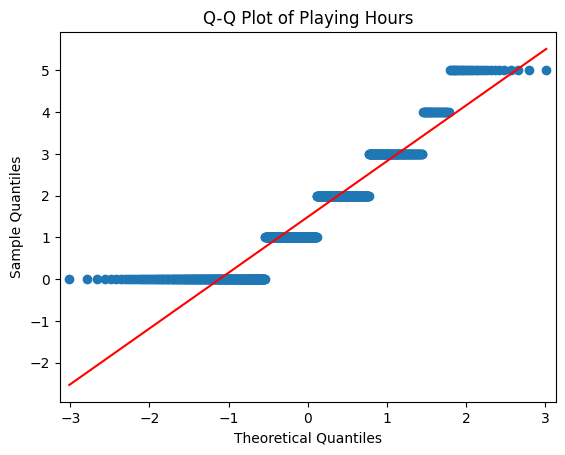

In [80]:
import statsmodels.api as sm
sm.qqplot(df['Playing Hours'], line='s')
plt.title('Q-Q Plot of Playing Hours')
plt.show()

###30. How does 'Grade' vary across different 'Playing Games' categories?


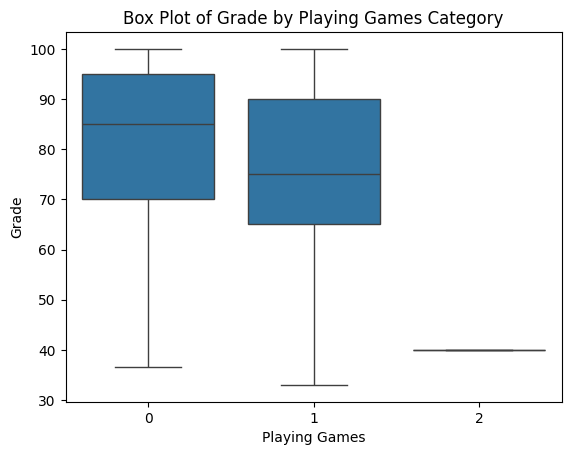

In [81]:
df.groupby('Playing Games')['Grade'].agg(['mean', 'median', 'min', 'max', 'std'])
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Playing Games', y='Grade', data=df)
plt.title('Box Plot of Grade by Playing Games Category')
plt.show()

##Data Visualization

###31. Plot a histogram of 'Grade'.


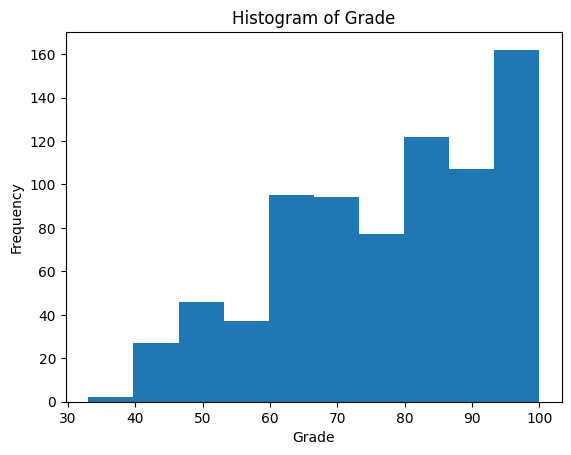

In [82]:
import matplotlib.pyplot as plt

plt.hist(df['Grade'], bins=10)  # Adjust the number of bins as needed
plt.title('Histogram of Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

###32. Create a box plot for 'Playing Hours'.


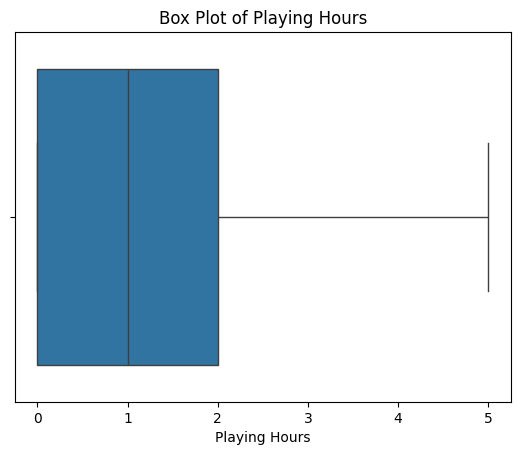

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Playing Hours'])
plt.title('Box Plot of Playing Hours')
plt.xlabel('Playing Hours')
plt.show()

###33. Generate a scatter plot of 'Parent Revenue' vs. 'Grade'.


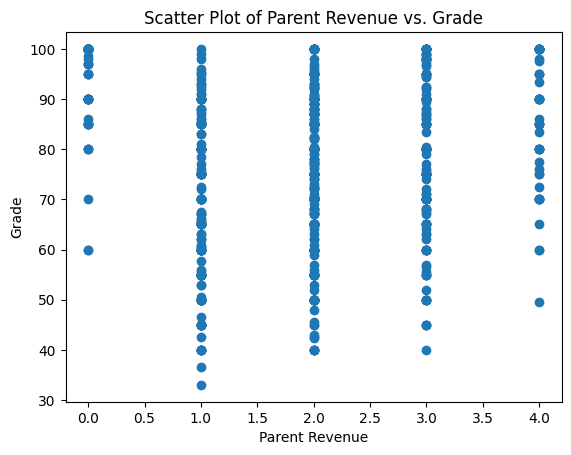

In [84]:
import matplotlib.pyplot as plt

plt.scatter(df['Parent Revenue'], df['Grade'])
plt.title('Scatter Plot of Parent Revenue vs. Grade')
plt.xlabel('Parent Revenue')
plt.ylabel('Grade')
plt.show()

###34. Create a heatmap of the correlation matrix.


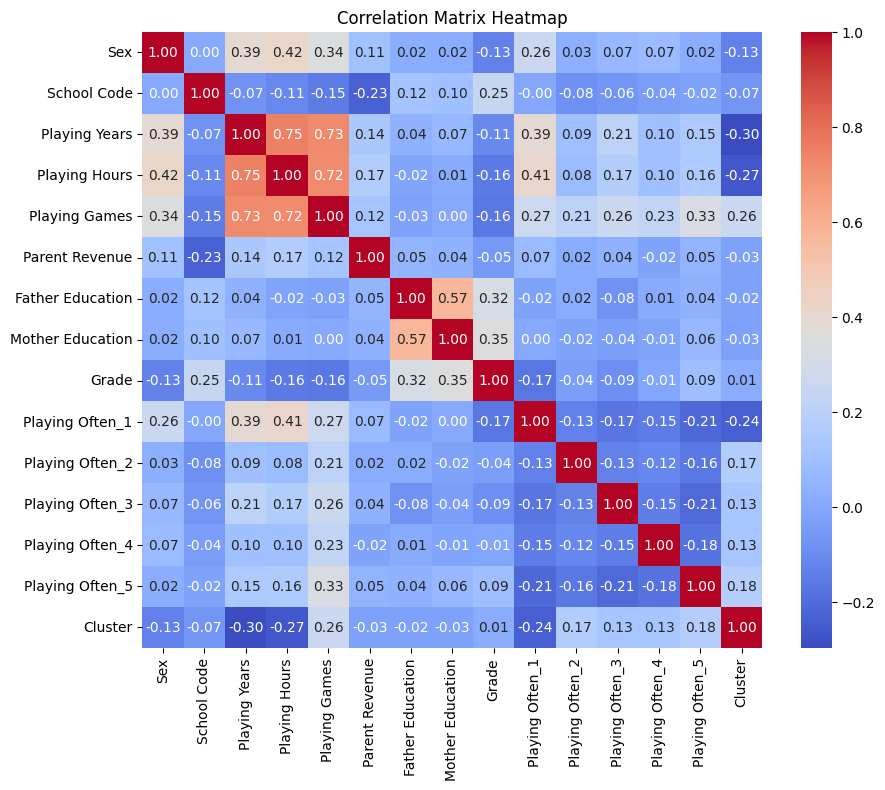

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

###35. Plot a bar chart showing the average 'Grade' per 'School Code'.


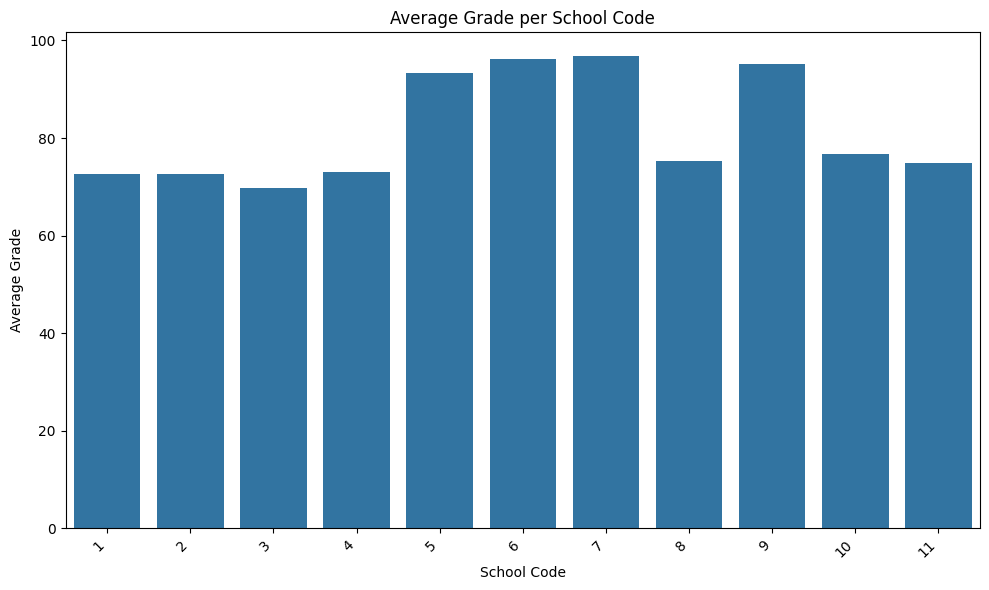

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better aesthetics

# Load your dataframe (assuming it's named 'df')
# df = pd.read_csv('/content/gameandgrade.csv')  # Replace with your actual path

# Calculate the average 'Grade' per 'School Code'
# Calculate the average 'Grade' per 'School Code',
# first ensure 'Grade' is numeric, handling potential errors
average_grade_per_school = df.groupby('School Code')['Grade'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean()).astype(float)
# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=average_grade_per_school.index, y=average_grade_per_school.values)
plt.title('Average Grade per School Code')
plt.xlabel('School Code')
plt.ylabel('Average Grade')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

###36. Generate a violin plot for 'Playing Often' vs. 'Grade'.


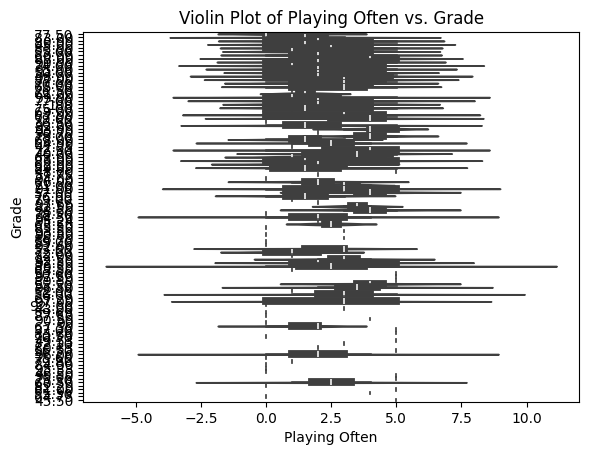

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
sns.violinplot(x='Playing Often', y='Grade', data=df)
plt.title('Violin Plot of Playing Often vs. Grade')
plt.xlabel('Playing Often')
plt.ylabel('Grade')
plt.show()

###37. Plot a pairplot of numerical variables.


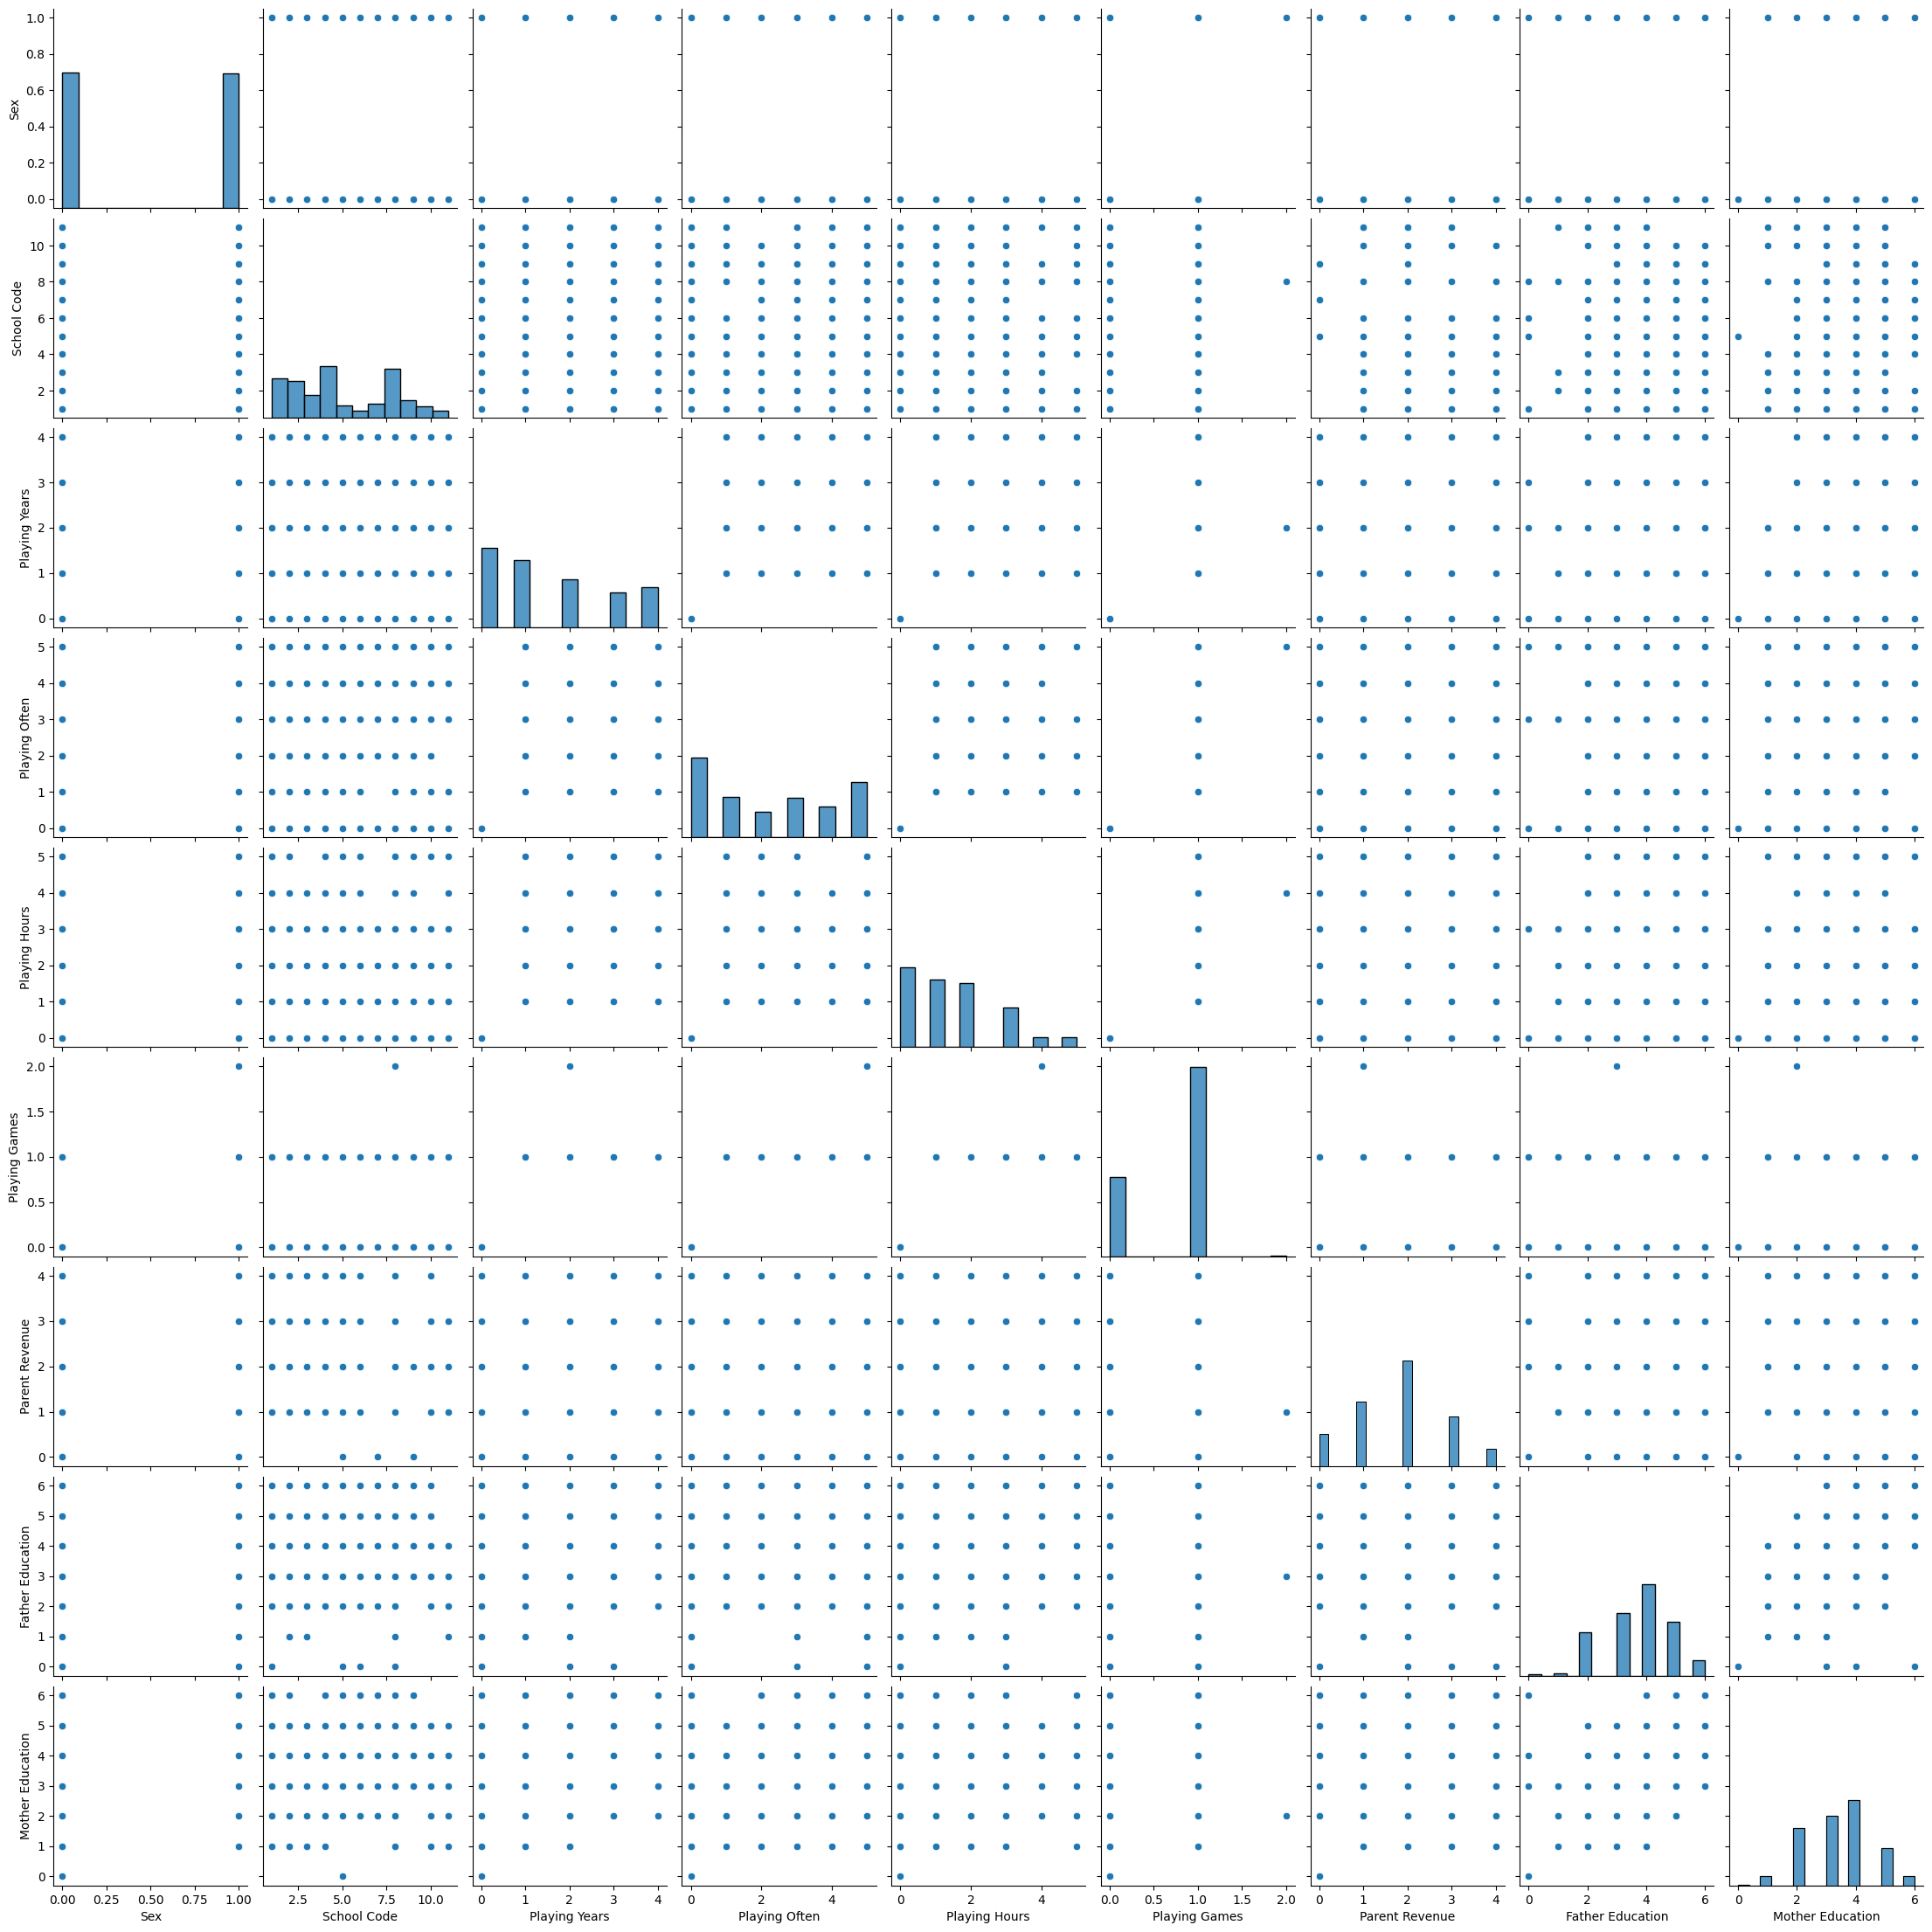

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy and assign it to the alias 'np'

# Assuming your DataFrame is named 'df'
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

###38. Create a pie chart showing the distribution of 'Sex'.


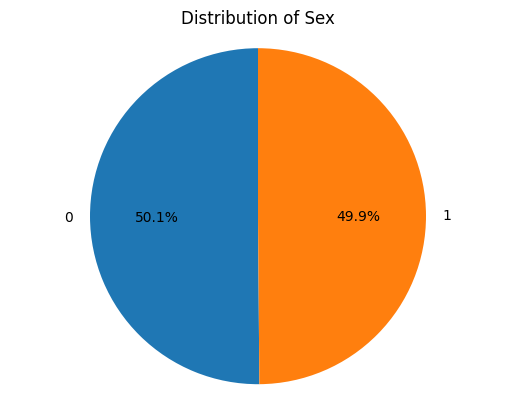

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df'
sex_counts = df['Sex'].value_counts()

# Create the pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###39. Generate a line plot for the trend of 'Grade' across different levels of 'Playing Years'.


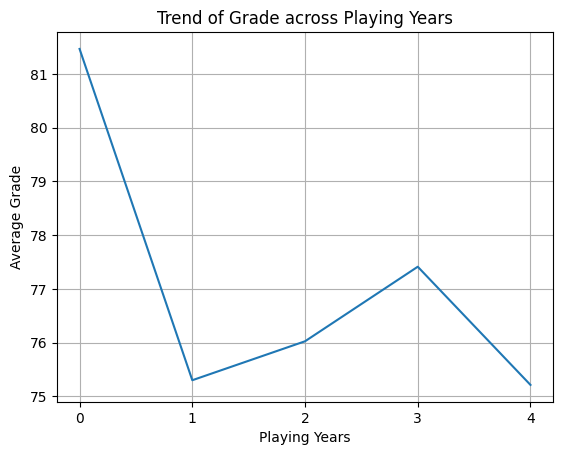

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Group data by 'Playing Years' and calculate the average 'Grade'
# Group data by 'Playing Years' and calculate the average 'Grade'
# Convert 'Grade' column to numeric before calculating the mean
average_grade_by_playing_years = df.groupby('Playing Years')['Grade'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean()).astype(float)

# Create the line plot (rest of the code remains the same)
plt.plot(average_grade_by_playing_years.index, average_grade_by_playing_years.values)
plt.title('Trend of Grade across Playing Years')
plt.xlabel('Playing Years')
plt.ylabel('Average Grade')
plt.xticks(average_grade_by_playing_years.index)  # Set x-axis ticks to Playing Years levels
plt.grid(True)  # Add a grid for better readability
plt.show()

###40. Use a swarm plot to visualize the relationship between 'Playing Hours' and 'Grade'.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categori

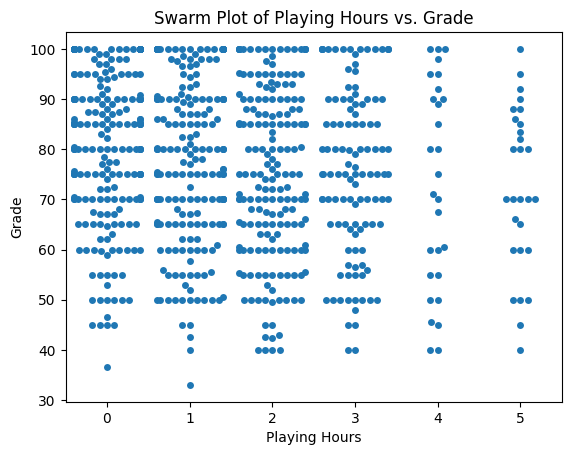

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Convert 'Playing Hours' and 'Grade' to numeric if they are not already
df['Playing Hours'] = pd.to_numeric(df['Playing Hours'], errors='coerce')
df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')


sns.swarmplot(x='Playing Hours', y='Grade', data=df)
plt.title('Swarm Plot of Playing Hours vs. Grade')
plt.xlabel('Playing Hours')
plt.ylabel('Grade')
plt.show()

##Advanced Analysis

###41. Apply a regression model to predict 'Grade' based on other features.


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named 'df'

# 1. Data Preparation
# Select features and target variable
features = ['Playing Hours', 'Playing Years', 'Parent Revenue']  # Add or remove features as needed
target = 'Grade'

# Convert selected columns to numeric, handling errors
for col in features + [target]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in selected columns
df = df.dropna(subset=features + [target])

# Create feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

# 3. Create and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = model.predict(X_test)

# 5. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the coefficients (weights) of the features
print("Coefficients:", model.coef_)

Mean Squared Error: 290.46885626617404
R-squared: 0.025942786655397287
Coefficients: [-1.93733419  0.30805561 -0.39472014]


###42. Perform k-means clustering on numerical features.


<ipython-input-101-203127e94fb7>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



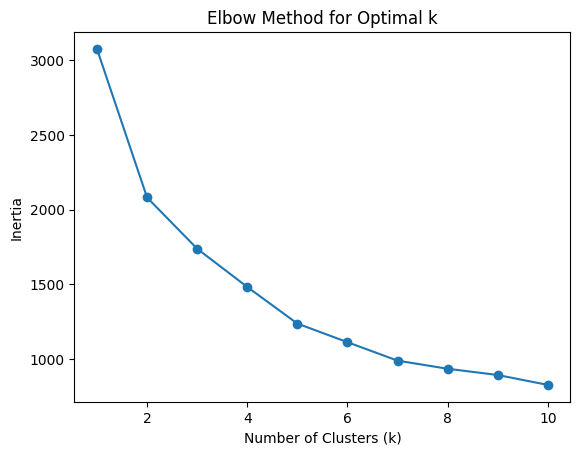

         Playing Hours  Playing Years  Parent Revenue      Grade
Cluster                                                         
0             2.779026       3.119850        2.209738  77.521948
1             0.565737       0.593625        1.438247  91.844104
2             1.043825       0.948207        1.840637  63.132669


In [101]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# 1. Select Numerical Features
numerical_features = ['Playing Hours', 'Playing Years', 'Parent Revenue', 'Grade']  # Add or remove as needed
X = df[numerical_features]

# Convert selected columns to numeric, handling errors
for col in numerical_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X = X.dropna()

# 2. Data Scaling (Important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Determine Optimal Number of Clusters (Elbow Method)
inertia = []
for i in range(1, 11):  # Check for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# 4. Apply K-Means with Optimal k (e.g., k=3 based on Elbow Method)
optimal_k = 3  # Replace with the value you choose from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# 5. Add Cluster Labels to DataFrame
df['Cluster'] = kmeans.labels_

# 6. Analyze and Visualize Clusters (Example)
print(df.groupby('Cluster')[numerical_features].mean())  # Analyze cluster characteristics
# You can create visualizations to explore the clusters further (e.g., scatter plots)

###43. Conduct a principal component analysis (PCA) to reduce dimensionality.


Explained Variance Ratio: [0.46312673 0.23965706]


<ipython-input-102-281d539c836c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



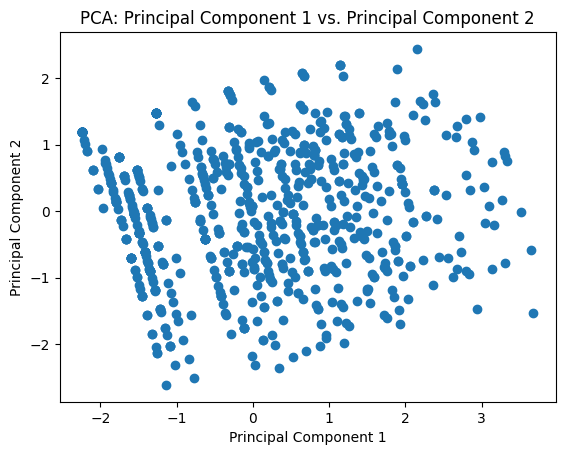

In [102]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# 1. Select Numerical Features
numerical_features = ['Playing Hours', 'Playing Years', 'Parent Revenue', 'Grade']  # Add or remove as needed
X = df[numerical_features]

# Convert selected columns to numeric, handling errors
for col in numerical_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X = X.dropna()

# 2. Data Scaling (Important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=2)  # Choose the desired number of components (e.g., 2)
principal_components = pca.fit_transform(X_scaled)

# 4. Create a DataFrame with Principal Components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# 5. Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

# 6. Visualize Principal Components (Optional)
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'])
plt.title('PCA: Principal Component 1 vs. Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

###44. Perform feature selection to identify the most important features affecting 'Grade'.


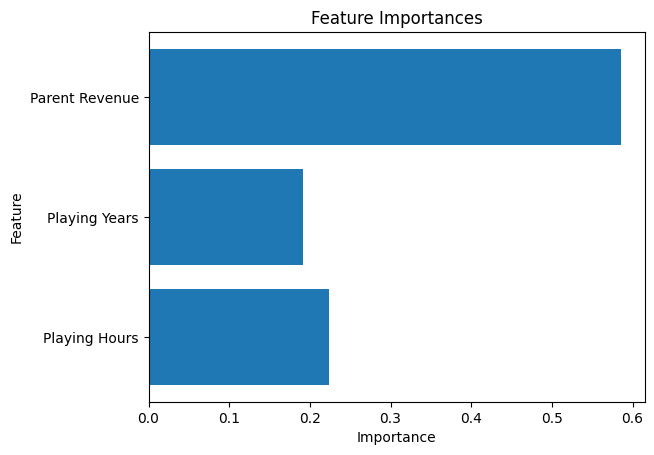

In [103]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# 1. Data Preparation
# Select features and target variable
features = ['Playing Hours', 'Playing Years', 'Parent Revenue']  # Add or remove features as needed
target = 'Grade'

# Convert selected columns to numeric, handling errors
for col in features + [target]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in selected columns
df = df.dropna(subset=features + [target])

# Create feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Random Forest Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 4. Get Feature Importances
importances = model.feature_importances_
feature_names = X.columns

# 5. Visualize Feature Importances
plt.barh(feature_names, importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###45. Create a decision tree to predict 'Grade'.


Mean Squared Error: 254.4416933523372
R-squared: 0.14675614463001796


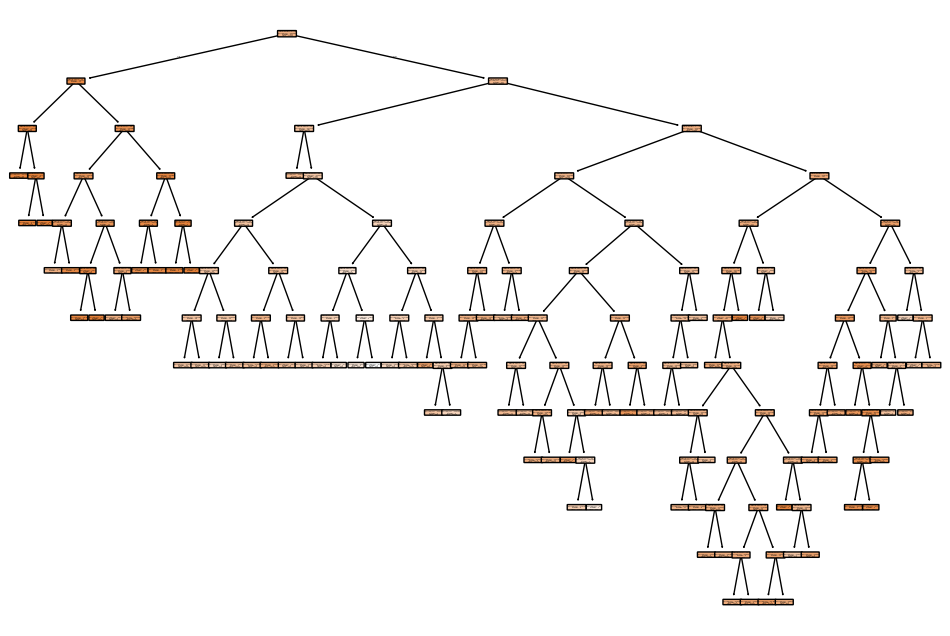

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree  # For visualizing the tree
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# 1. Data Preparation
# Select features and target variable
features = ['Playing Hours', 'Playing Years', 'Parent Revenue']
target = 'Grade'

# Convert selected columns to numeric, handling errors
for col in features + [target]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in selected columns
df = df.dropna(subset=features + [target])

# Create feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and Train the Decision Tree Model
model = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters here
model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = model.predict(X_test)

# 5. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 6. Visualize the Decision Tree (Optional)
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=features, filled=True, rounded=True)
plt.show()


###46. Find the optimal number of clusters using the elbow method.


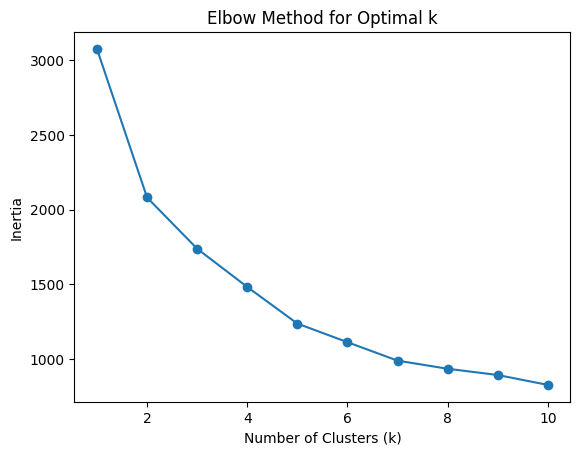

In [105]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and numerical features are selected as before

# 1. Select Numerical Features and Preprocess Data (as in previous k-means example)
numerical_features = ['Playing Hours', 'Playing Years', 'Parent Revenue', 'Grade']
X = df[numerical_features]
# ... (Data type conversion and handling missing values) ...
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Calculate Inertia for Different k Values
inertia = []
k_range = range(1, 11)  # Check for k values from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# 4. Identify the Elbow Point
# Visually inspect the plot to find the 'elbow' point
# where the rate of decrease in inertia starts to slow down.
# This point suggests a good value for the optimal number of clusters.

###47. Create a machine learning model to predict 'Grade'.


<ipython-input-106-b692c793e5cc>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



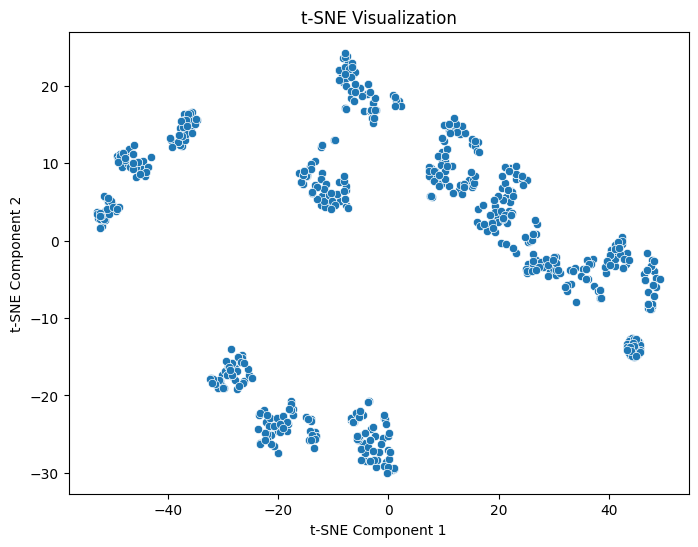

In [106]:
!pip install scikit-learn  # Make sure scikit-learn is installed

import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns # Import Seaborn

# Assuming your DataFrame is named 'df'

# 1. Select Numerical Features
numerical_features = ['Playing Hours', 'Playing Years', 'Parent Revenue', 'Grade']  # Add or remove as needed
X = df[numerical_features]

# Convert selected columns to numeric, handling errors
for col in numerical_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X = X.dropna()  # Drop rows with any NaNs after conversion

# 2. Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)  # You can adjust parameters like perplexity
X_tsne = tsne.fit_transform(X)

# 3. Create DataFrame with t-SNE Components
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# 4. (Optional) Add Cluster Labels if you have them
# If you have cluster labels from a previous step, add them to the DataFrame:
# tsne_df['Cluster'] = df['Cluster']  # Assuming 'Cluster' is the column with cluster labels

# 5. Visualize with Seaborn (better aesthetics)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=tsne_df)
# If you have cluster labels, use 'hue' to color points by cluster:
# sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Cluster', data=tsne_df)
plt.title('t-SNE Visualization')
plt.show()

###48. Perform t-SNE for dimensionality reduction and visualization.


<ipython-input-107-9263f6f19556>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



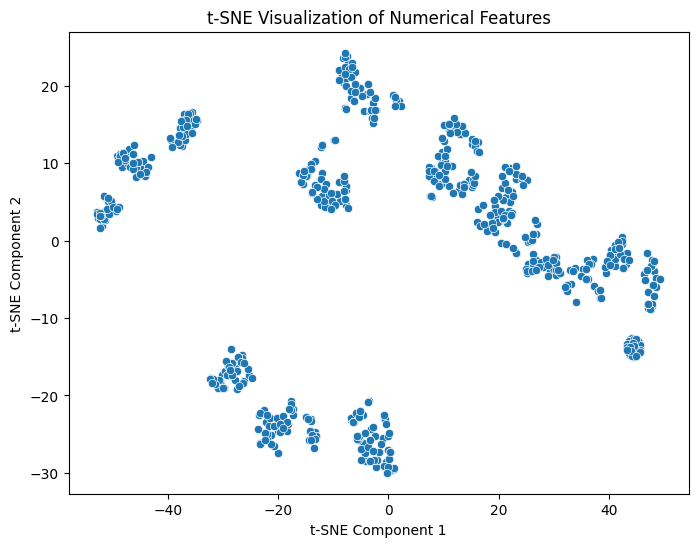

In [107]:
!pip install scikit-learn  # Install scikit-learn if not already installed

import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better visualization

# Assuming your DataFrame is named 'df'

# 1. Select Numerical Features
numerical_features = ['Playing Hours', 'Playing Years', 'Parent Revenue', 'Grade']
X = df[numerical_features]

# 2. Data Type Conversion and Handling Missing Values
for col in numerical_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert to numeric, handle errors
X = X.dropna()  # Drop rows with any missing values

# 3. Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Adjust perplexity if needed
X_tsne = tsne.fit_transform(X)

# 4. Create DataFrame with t-SNE Components
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# 5. (Optional) Add Cluster Labels if available
# if 'Cluster' in df.columns:  # Check if 'Cluster' column exists
#     tsne_df['Cluster'] = df['Cluster']

# 6. Visualize with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=tsne_df)
# If you have cluster labels, uncomment the line below to color by cluster:
# sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Cluster', data=tsne_df)
plt.title('t-SNE Visualization of Numerical Features')
plt.show()

###49. Calculate the variance inflation factor (VIF) to check multicollinearity.


In [108]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your DataFrame is named 'df'

# 1. Select Numerical Features
numerical_features = ['Playing Hours', 'Playing Years', 'Parent Revenue']  # Add or remove as needed

# 2. Data Type Conversion and Handling Missing Values
X = df[numerical_features]  # Create a subset with numerical features
for col in numerical_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert to numeric, handle errors
X = X.dropna()  # Drop rows with missing values

# 3. Calculate VIF for Each Feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 4. Print VIF Results
print(vif_data)

          feature       VIF
0   Playing Hours  5.077623
1   Playing Years  5.015117
2  Parent Revenue  2.061887


<ipython-input-108-9a3a82ec8d41>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###50. Train a logistic regression model to predict whether 'Grade' is above a threshold.


In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming your DataFrame is named 'df'

# 1. Data Preparation
# Select features and target variable
features = ['Playing Hours', 'Playing Years', 'Parent Revenue']
target = 'Grade'
threshold = 75  # Set your desired threshold for 'Grade'

# Convert selected columns to numeric, handling errors
for col in features + [target]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in selected columns
df = df.dropna(subset=features + [target])

# Create feature matrix (X) and target vector (y)
X = df[features]
y = (df[target] > threshold).astype(int)  # Create binary target (1 if above threshold, 0 otherwise)

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and Train the Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = model.predict(X_test)

# 5. Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

Accuracy: 0.5325

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.30      0.37        69
           1       0.56      0.72      0.63        85

    accuracy                           0.53       154
   macro avg       0.51      0.51      0.50       154
weighted avg       0.52      0.53      0.51       154



##Trend and Pattern Analysis

###51. What is the trend of 'Grade' over different years of playing?


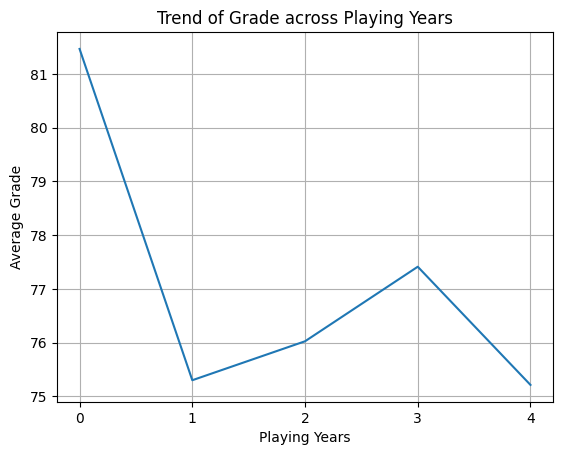

Playing Years
0    81.464469
1    75.300622
2    76.025109
3    77.412121
4    75.213158
Name: Grade, dtype: float64


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# 1. Group data by 'Playing Years' and calculate the average 'Grade'
# Group data by 'Playing Years' and calculate the average 'Grade'
# Convert 'Grade' column to numeric before calculating the mean
average_grade_by_playing_years = df.groupby('Playing Years')['Grade'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean()).astype(float)


# 2. Create a line plot to visualize the trend
plt.plot(average_grade_by_playing_years.index, average_grade_by_playing_years.values)
plt.title('Trend of Grade across Playing Years')
plt.xlabel('Playing Years')
plt.ylabel('Average Grade')
plt.xticks(average_grade_by_playing_years.index)  # Set x-axis ticks to Playing Years levels
plt.grid(True)  # Add a grid for better readability
plt.show()

# (Optional) Print the average grades for each Playing Years level
print(average_grade_by_playing_years)

###52. Does 'Grade' improve with higher 'Father Education' levels?


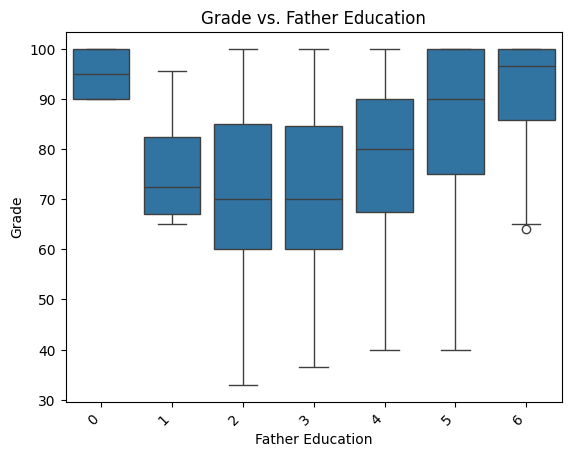

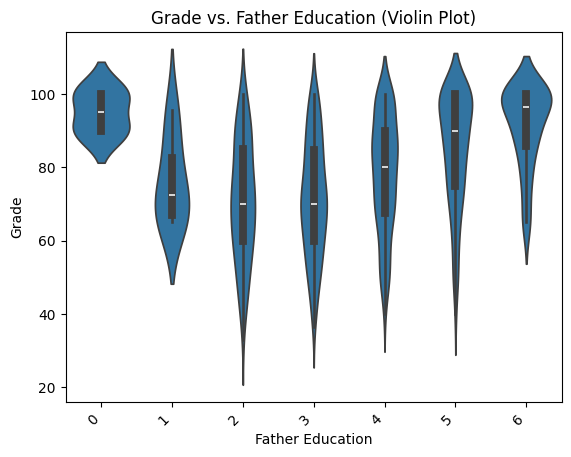

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a box plot to visualize the relationship
sns.boxplot(x='Father Education', y='Grade', data=df)
plt.title('Grade vs. Father Education')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

# Create a violin plot for a more detailed view
sns.violinplot(x='Father Education', y='Grade', data=df)
plt.title('Grade vs. Father Education (Violin Plot)')
plt.xticks(rotation=45, ha='right')
plt.show()

###53. How does 'Parent Revenue' impact 'Playing Hours'?


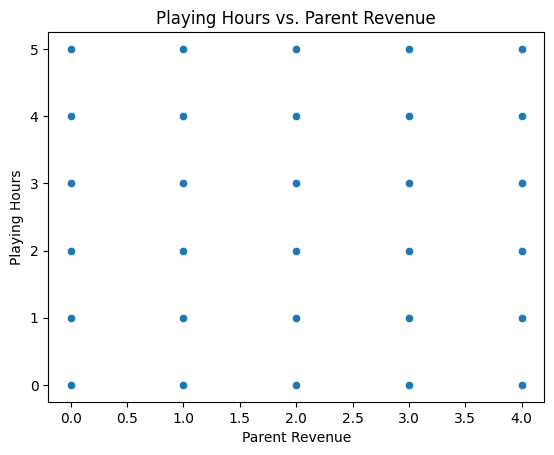

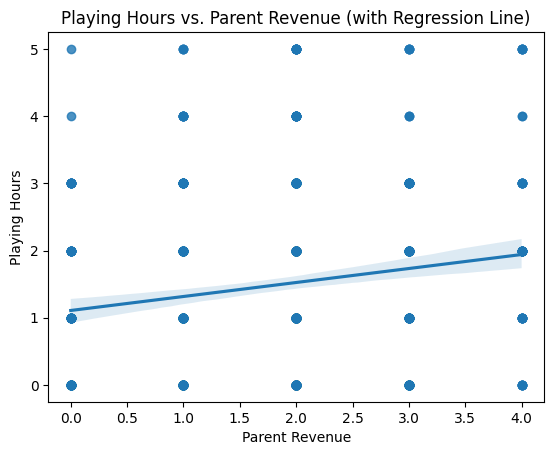

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='Parent Revenue', y='Playing Hours', data=df)
plt.title('Playing Hours vs. Parent Revenue')
plt.show()

# (Optional) Add a regression line to the scatter plot
sns.regplot(x='Parent Revenue', y='Playing Hours', data=df)
plt.title('Playing Hours vs. Parent Revenue (with Regression Line)')
plt.show()

###54. Are there seasonal patterns in 'Playing Games'?


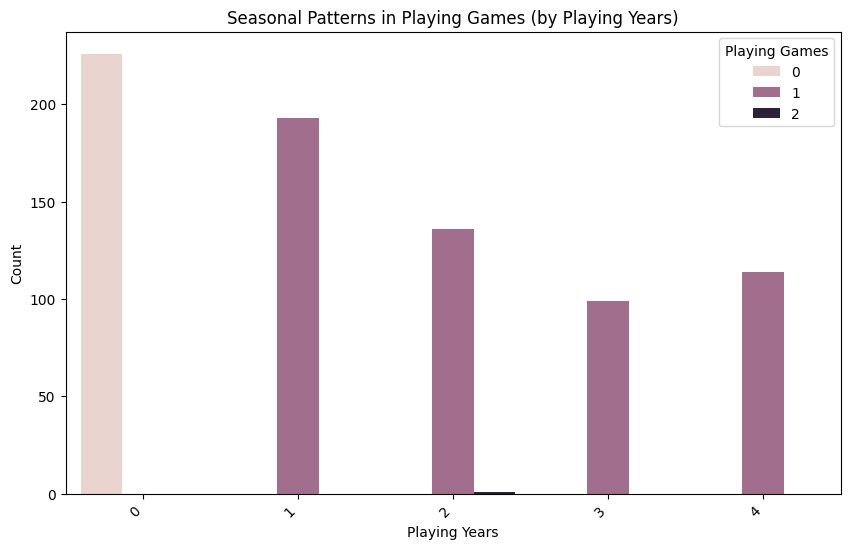

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df' and 'Playing Games' is categorical

# 1. Group by 'Playing Years' and calculate the frequency of each 'Playing Games' category
seasonal_data = df.groupby(['Playing Years', 'Playing Games'])['Playing Games'].count().reset_index(name='Count')

# 2. Visualize using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Playing Years', y='Count', hue='Playing Games', data=seasonal_data)
plt.title('Seasonal Patterns in Playing Games (by Playing Years)')
plt.xlabel('Playing Years')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Playing Games')
plt.show()

###55. Do students with high 'Playing Hours' perform better in 'Grade'?


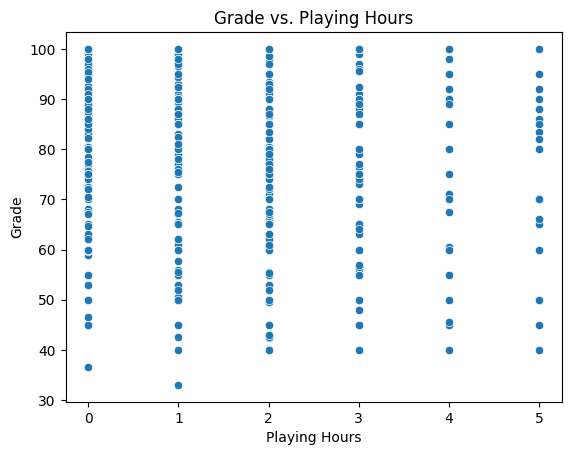

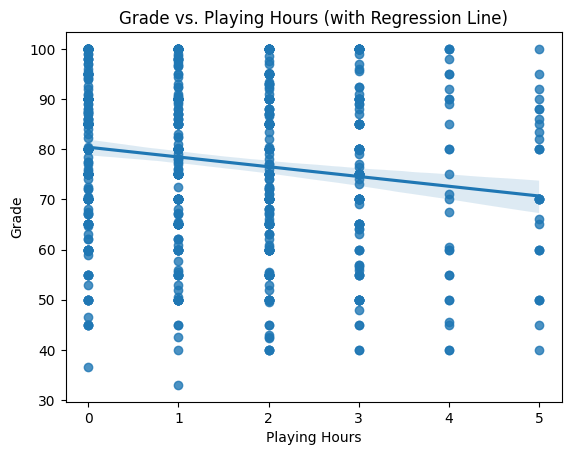

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='Playing Hours', y='Grade', data=df)
plt.title('Grade vs. Playing Hours')
plt.show()

# (Optional) Add a regression line to the scatter plot
sns.regplot(x='Playing Hours', y='Grade', data=df)
plt.title('Grade vs. Playing Hours (with Regression Line)')
plt.show()

###56. Does 'School Code' impact 'Grade' significantly?


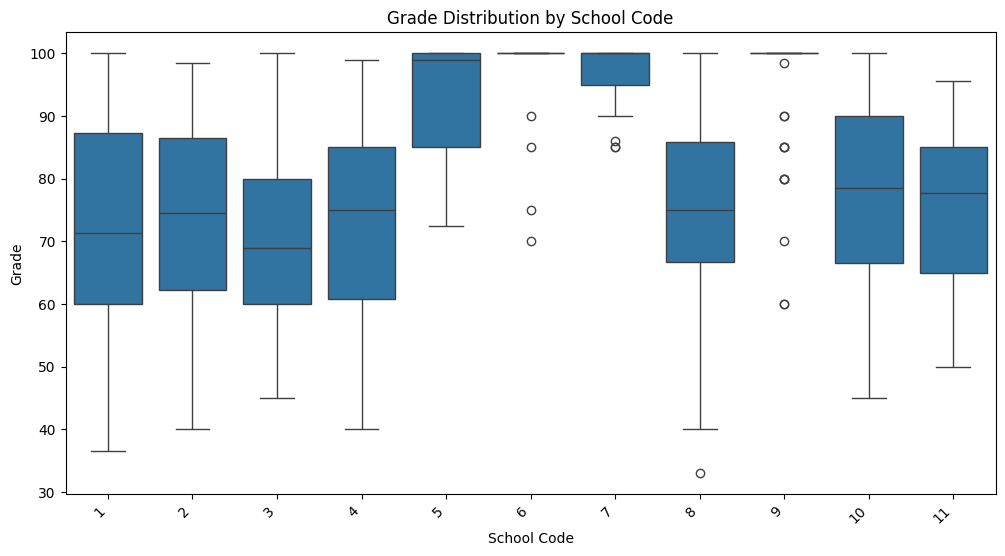

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a box plot to visualize the relationship
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.boxplot(x='School Code', y='Grade', data=df)
plt.title('Grade Distribution by School Code')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

###57. Is there a relationship between 'Playing Often' and 'Playing Years'?


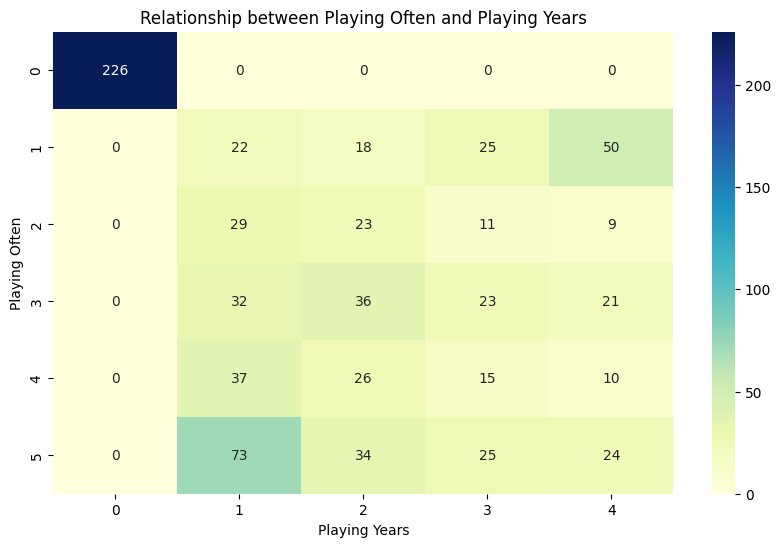

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a heatmap of the cross-tabulation
cross_tab = pd.crosstab(df['Playing Often'], df['Playing Years'])
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")  # fmt="d" for integer display
plt.title('Relationship between Playing Often and Playing Years')
plt.xlabel('Playing Years')
plt.ylabel('Playing Often')
plt.show()

###58. Does 'Sex' influence 'Playing Hours'?


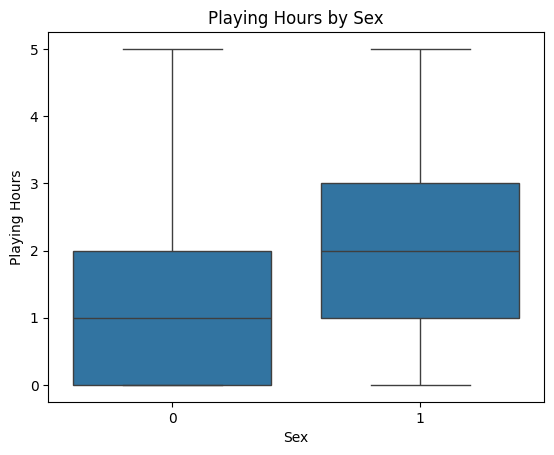

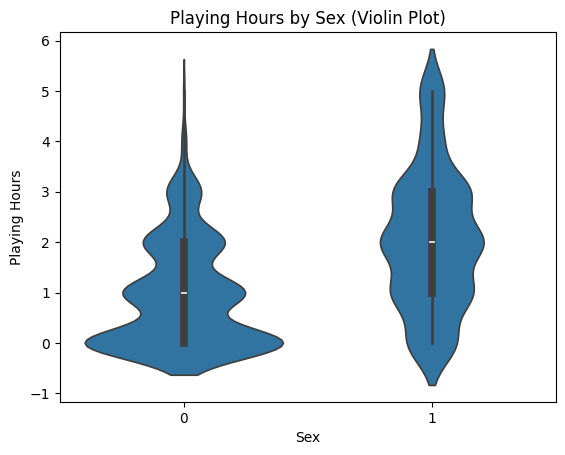

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a box plot to visualize the relationship
sns.boxplot(x='Sex', y='Playing Hours', data=df)
plt.title('Playing Hours by Sex')
plt.show()

# Create a violin plot for a more detailed view
sns.violinplot(x='Sex', y='Playing Hours', data=df)
plt.title('Playing Hours by Sex (Violin Plot)')
plt.show()

###59. How do 'Playing Games' vary across different 'School Code'?


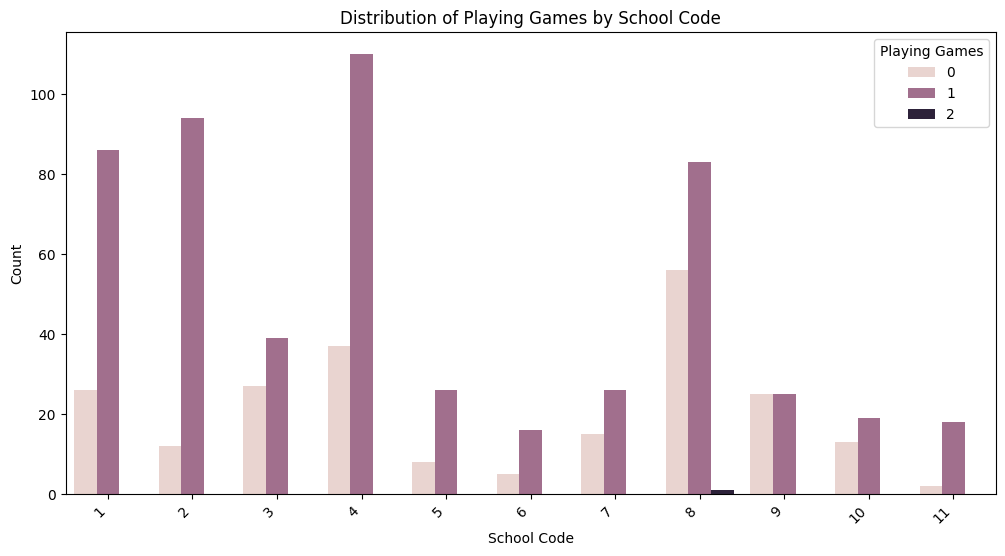

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a clustered bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.countplot(x='School Code', hue='Playing Games', data=df)
plt.title('Distribution of Playing Games by School Code')
plt.xlabel('School Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Playing Games')
plt.show()

###60. Are students with higher 'Playing Games' getting lower grades?


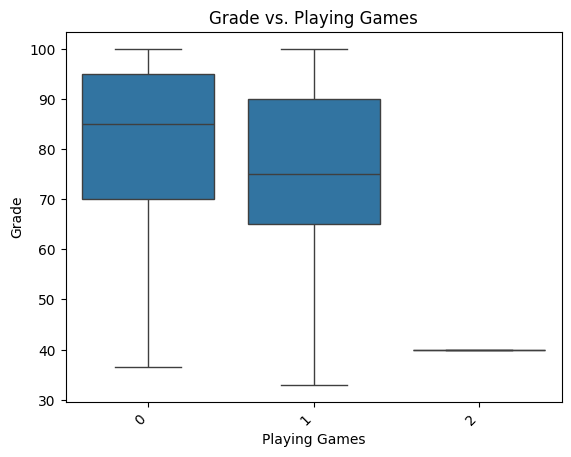

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a box plot to visualize the relationship
sns.boxplot(x='Playing Games', y='Grade', data=df)
plt.title('Grade vs. Playing Games')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

##Hypothesis Testing

###61. Is there a significant difference in 'Grade' between different 'Playing Years'?


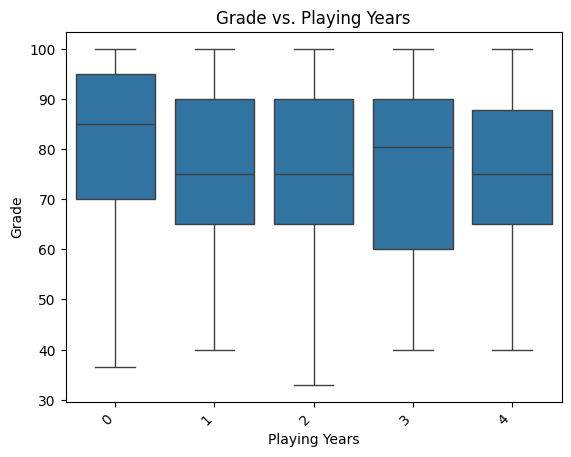

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a box plot to visualize the relationship
sns.boxplot(x='Playing Years', y='Grade', data=df)
plt.title('Grade vs. Playing Years')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed for readability
plt.show()

###62. Does 'Playing Hours' significantly impact 'Grade'?


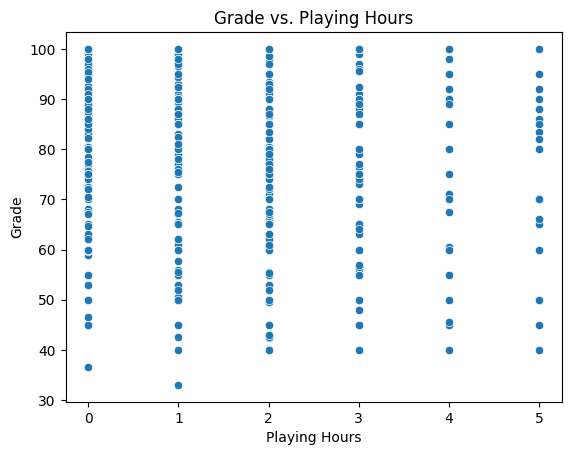

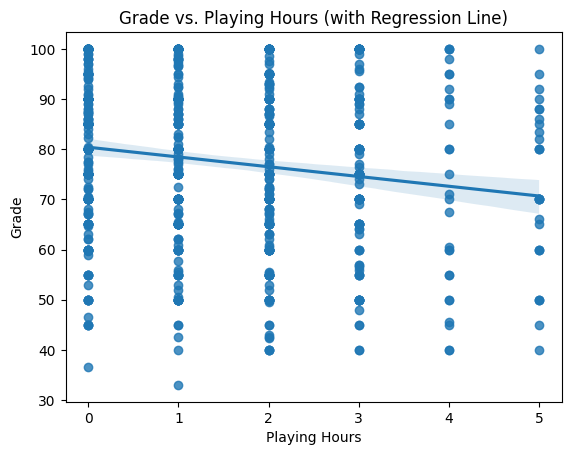

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='Playing Hours', y='Grade', data=df)
plt.title('Grade vs. Playing Hours')
plt.show()

# (Optional) Add a regression line to the scatter plot
sns.regplot(x='Playing Hours', y='Grade', data=df)
plt.title('Grade vs. Playing Hours (with Regression Line)')
plt.show()

###63. Is there a correlation between 'Parent Revenue' and 'Playing Hours'?


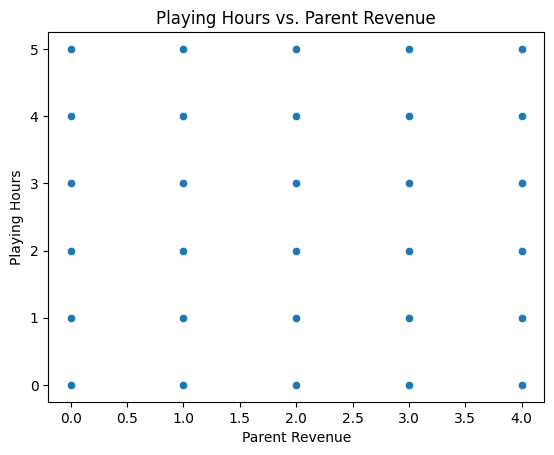

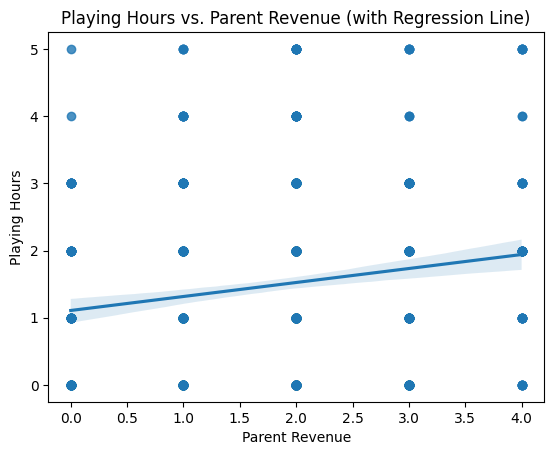

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='Parent Revenue', y='Playing Hours', data=df)
plt.title('Playing Hours vs. Parent Revenue')
plt.show()

# (Optional) Add a regression line to the scatter plot
sns.regplot(x='Parent Revenue', y='Playing Hours', data=df)
plt.title('Playing Hours vs. Parent Revenue (with Regression Line)')
plt.show()

###64. Do students with more 'Playing Games' perform worse?


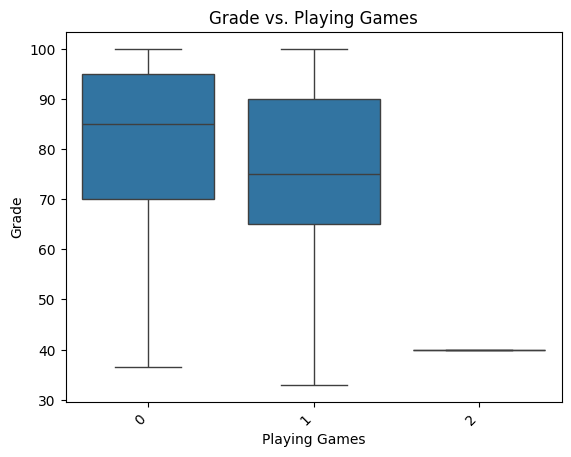

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a box plot to visualize the relationship
sns.boxplot(x='Playing Games', y='Grade', data=df)
plt.title('Grade vs. Playing Games')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

###64. Do students with more 'Playing Games' perform worse?


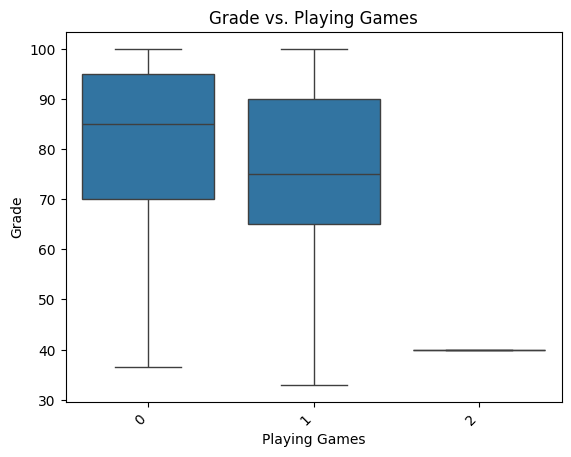

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a box plot to visualize the relationship
sns.boxplot(x='Playing Games', y='Grade', data=df)
plt.title('Grade vs. Playing Games')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

###65. Does 'Father Education' significantly impact 'Grade'?


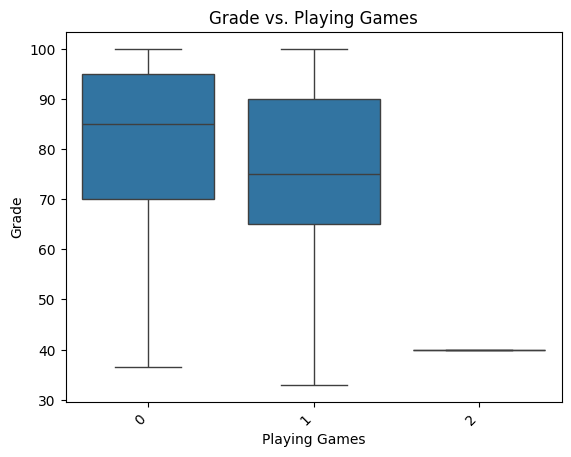

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a box plot to visualize the relationship
sns.boxplot(x='Playing Games', y='Grade', data=df)
plt.title('Grade vs. Playing Games')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

###66. Is there a statistical difference in 'Grade' between males and females?


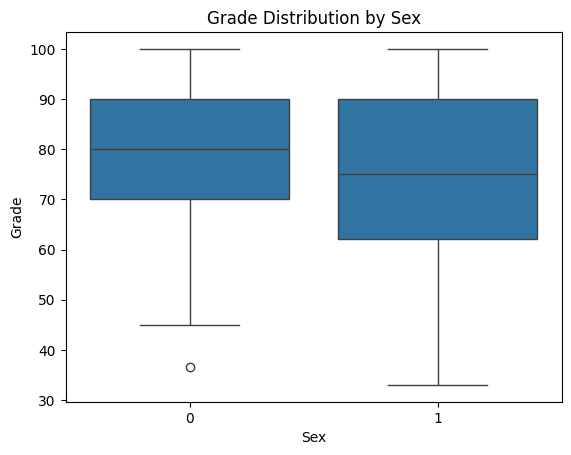

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a box plot to visualize the relationship
sns.boxplot(x='Sex', y='Grade', data=df)
plt.title('Grade Distribution by Sex')
plt.show()

###67. Does 'Mother Education' impact 'Grade' more than 'Father Education'?


ValueError: keyword ha is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

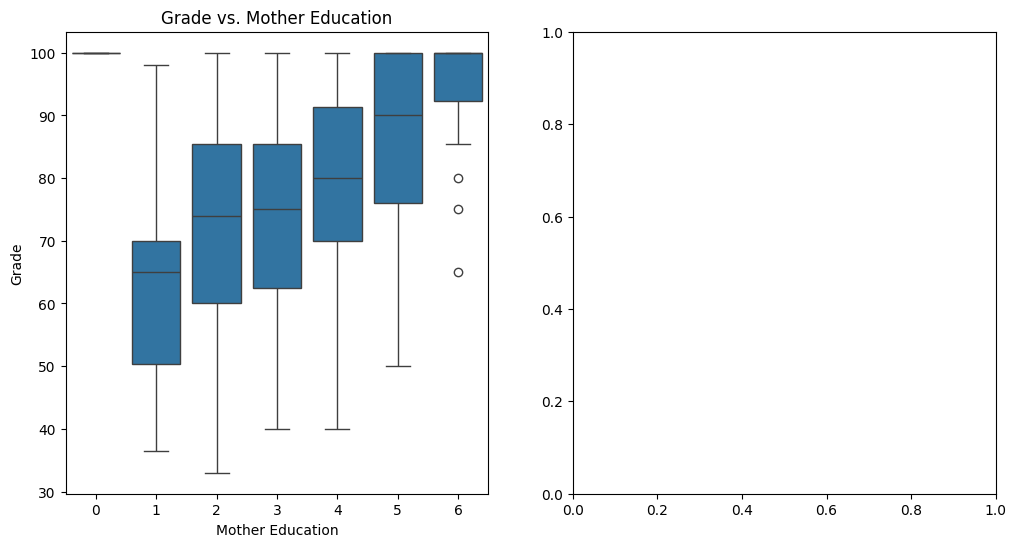

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create box plots for Mother Education vs. Grade and Father Education vs. Grade
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns of plots

sns.boxplot(x='Mother Education', y='Grade', data=df, ax=axes[0])
axes[0].set_title('Grade vs. Mother Education')
axes[0].tick_params(axis='x', rotation=45, ha='right')

sns.boxplot(x='Father Education', y='Grade', data=df, ax=axes[1])
axes[1].set_title('Grade vs. Father Education')
axes[1].tick_params(axis='x', rotation=45, ha='right')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

###68. Does the variance of 'Grade' differ by 'School Code'?


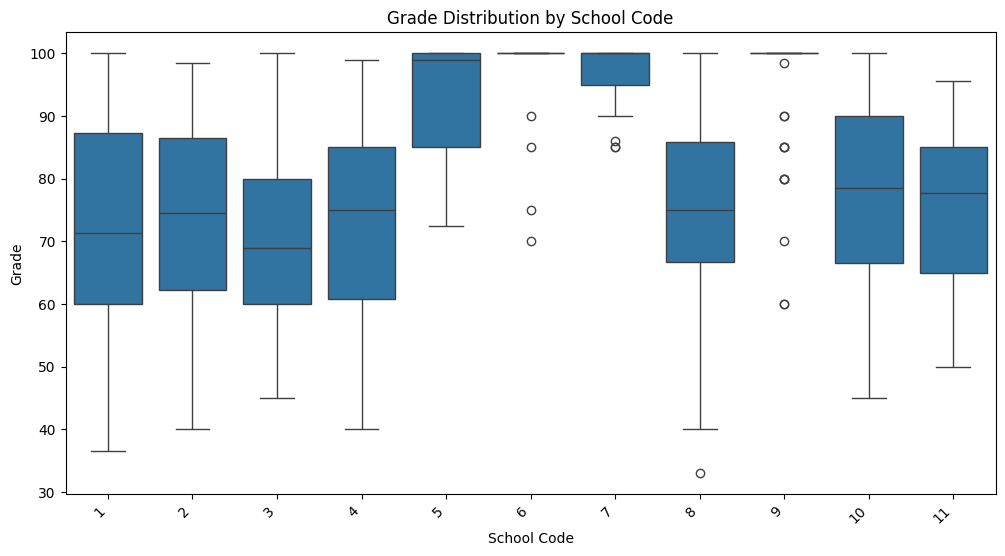

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create box plots to visualize the distribution of 'Grade' for each 'School Code'
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.boxplot(x='School Code', y='Grade', data=df)
plt.title('Grade Distribution by School Code')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

###69. Are 'Playing Hours' significantly different for different 'Playing Often' levels?


In [129]:
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm # Import anova_lm from statsmodels.stats.anova

model = sm.ols('Q("Playing Hours") ~ C(Q("Playing Often"))', data=df).fit()
anova_table = anova_lm(model, typ=2) # Use anova_lm directly
print(anova_table)

                           sum_sq     df           F         PR(>F)
C(Q("Playing Often"))  784.785649    5.0  203.189815  1.357711e-137
Residual               589.391204  763.0         NaN            NaN


###70. Does 'Playing Years' have an impact on 'Playing Hours'?


Correlation between Playing Years and Playing Hours: 0.7491578700089109


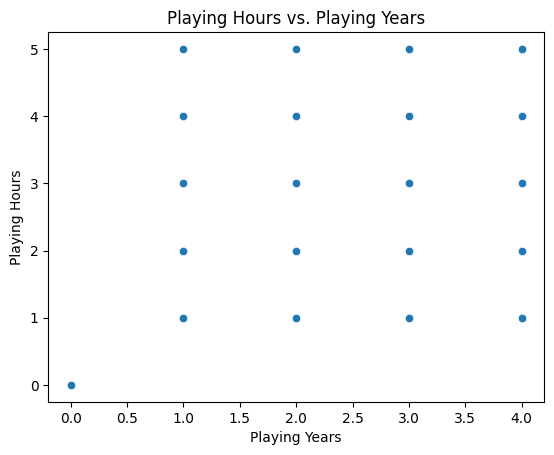

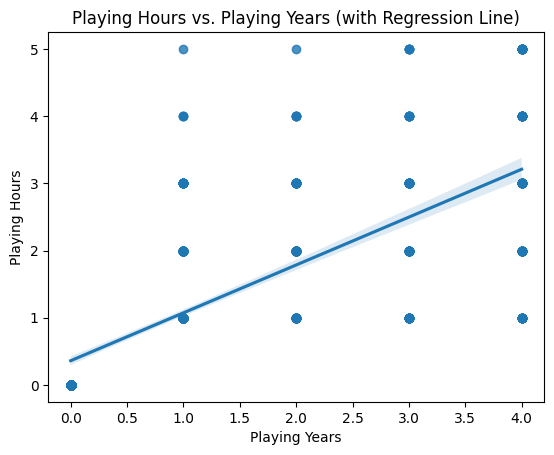

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Calculate the correlation between 'Playing Years' and 'Playing Hours'
correlation = df['Playing Years'].corr(df['Playing Hours'])
print(f"Correlation between Playing Years and Playing Hours: {correlation}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='Playing Years', y='Playing Hours', data=df)
plt.title('Playing Hours vs. Playing Years')
plt.show()

# (Optional) Add a regression line to the scatter plot
sns.regplot(x='Playing Years', y='Playing Hours', data=df)
plt.title('Playing Hours vs. Playing Years (with Regression Line)')
plt.show()

##Advanced Visualization

###71. Create a joint plot of 'Parent Revenue' vs. 'Grade'.


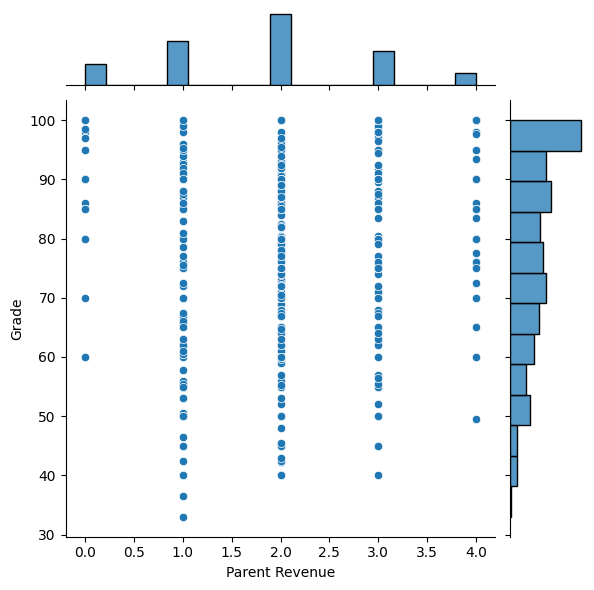

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create the joint plot
sns.jointplot(x='Parent Revenue', y='Grade', data=df)
plt.show()

###72. Generate a heatmap showing missing values.


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



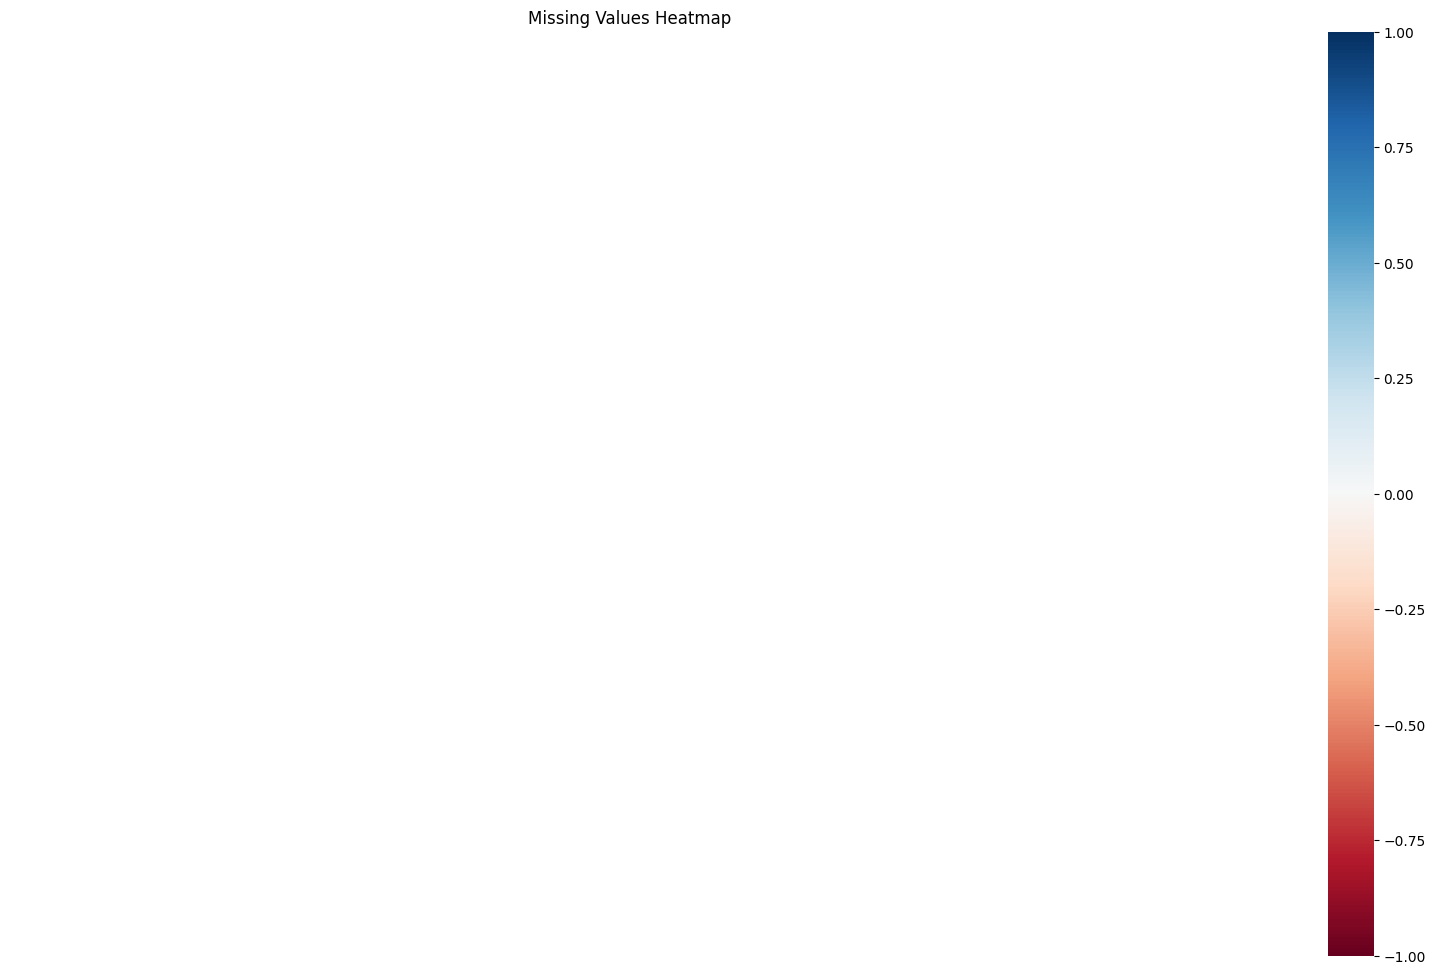

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno  # Import missingno

# Assuming your DataFrame is named 'df'

# Create the missing values heatmap
msno.heatmap(df)
plt.title('Missing Values Heatmap')
plt.show()

###73. Use a facet grid to plot 'Grade' distributions by 'Playing Often'.


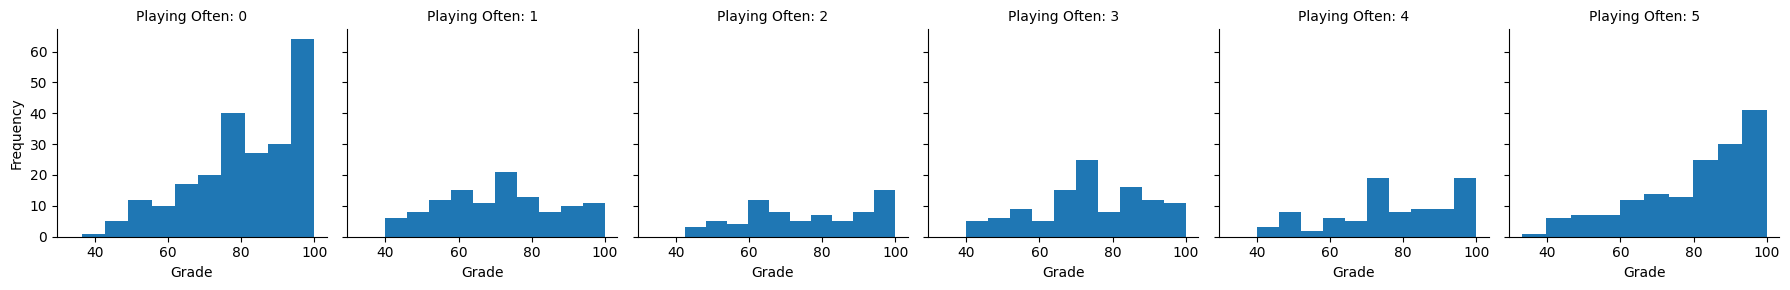

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create the facet grid
g = sns.FacetGrid(df, col="Playing Often")  # Create grid with 'Playing Often' as columns

# Add histograms to each facet
g.map(plt.hist, "Grade")  # Plot histograms of 'Grade' in each facet

# Set plot titles and labels
g.set_titles("Playing Often: {col_name}")  # Set titles for each facet
g.set_axis_labels("Grade", "Frequency")  # Set axis labels

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

###74. Create a pairwise correlation heatmap.


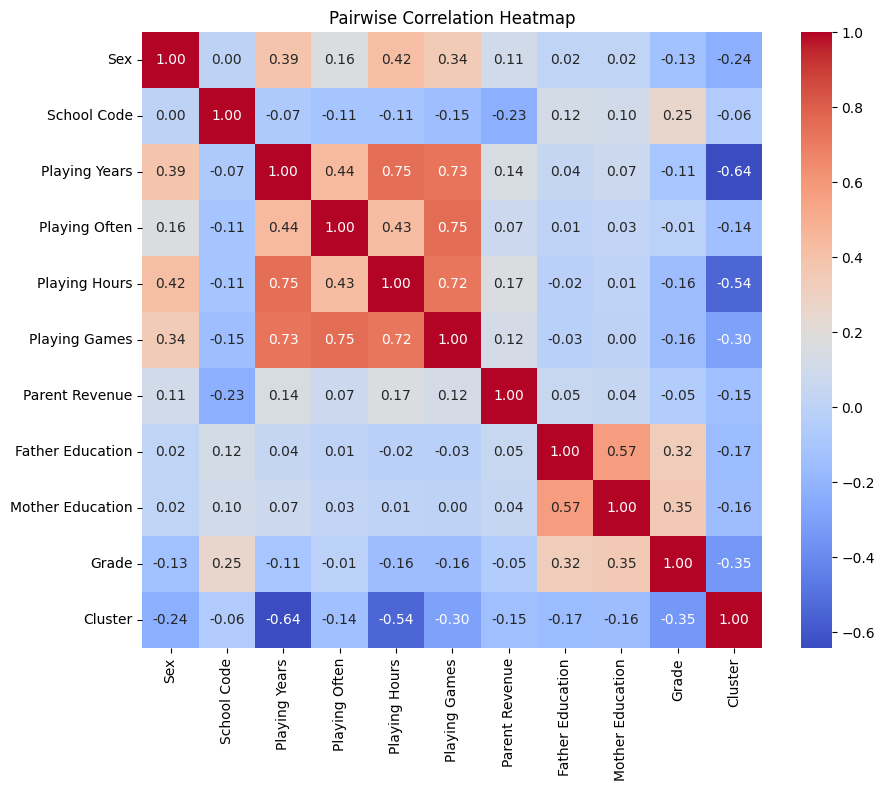

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap')
plt.show()

###75. Generate a KDE plot for 'Grade'.


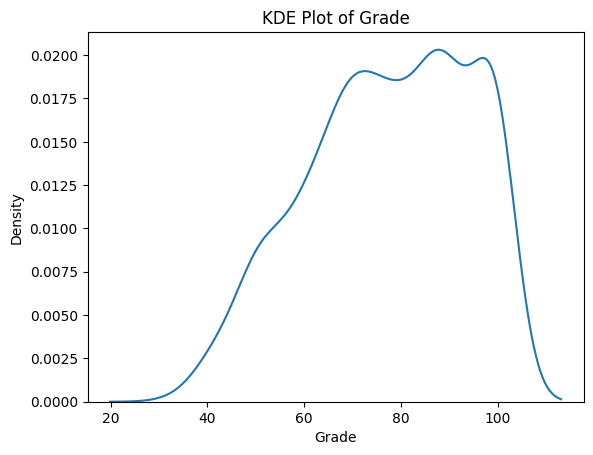

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# Assuming your data is in 'gameandgrade.csv'
df = pd.read_csv('/content/gameandgrade.csv')

# Convert 'Grade' column to numeric, handling errors
df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')

# Drop rows with missing values in 'Grade' column
df = df.dropna(subset=['Grade'])

sns.kdeplot(df['Grade'])
plt.title('KDE Plot of Grade')
plt.xlabel('Grade')
plt.ylabel('Density')
plt.show()

###76. Plot a ridgeline plot for 'Playing Games'.


<Figure size 1000x600 with 0 Axes>

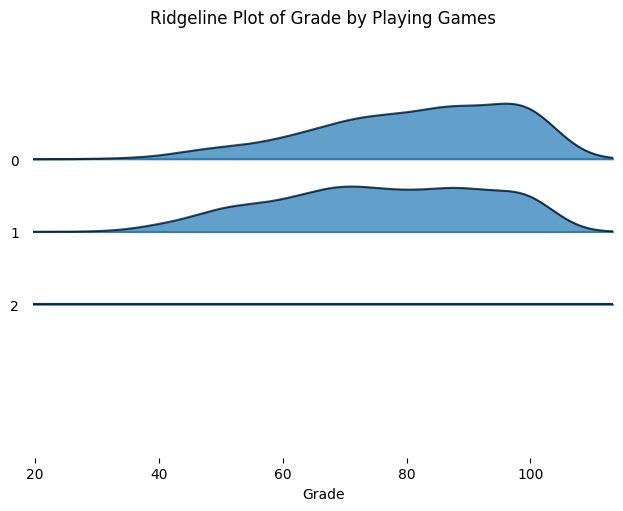

In [88]:
!pip install joypy

import joypy
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# Create the ridgeline plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
joypy.joyplot(df, column='Grade', by='Playing Games',
             overlap=3,  # Adjust overlap between curves
             linecolor='black',  # Customize line color
             fill=True,  # Fill the area under the curves
             alpha=0.7)  # Adjust transparency
plt.title('Ridgeline Plot of Grade by Playing Games')
plt.xlabel('Grade')
plt.ylabel('Playing Games')
plt.show()

###77. Create a mosaic plot of 'Father Education' vs. 'Mother Education'.


<Figure size 1000x600 with 0 Axes>

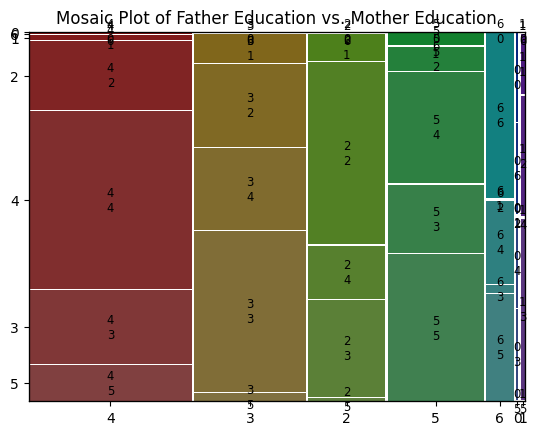

In [89]:
!pip install statsmodels

import pandas as pd
import statsmodels.graphics.mosaicplot as mosaicplot
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# Create the mosaic plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
mosaicplot.mosaic(df, ['Father Education', 'Mother Education'], title='Mosaic Plot of Father Education vs. Mother Education')
plt.show()

###78. Generate a stacked bar chart for 'Playing Often' vs. 'Sex'.


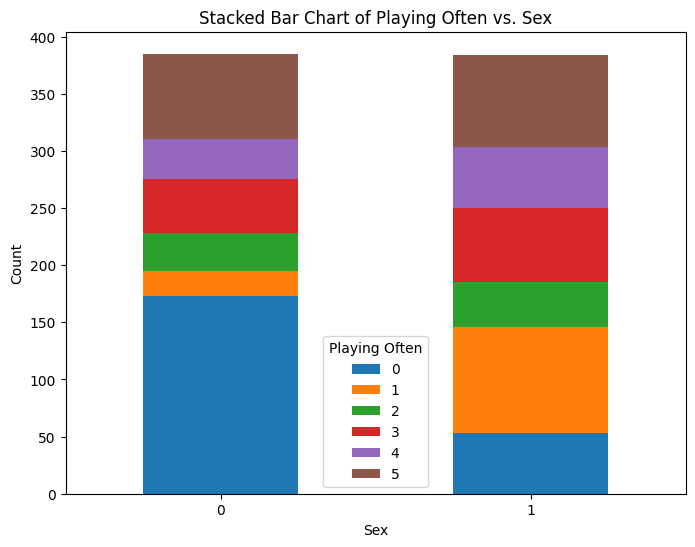

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# Create a cross-tabulation of 'Playing Often' and 'Sex'
cross_tab = pd.crosstab(df['Sex'], df['Playing Often'])

# Plot the stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6))  # Adjust figsize as needed
plt.title('Stacked Bar Chart of Playing Often vs. Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Playing Often')
plt.show()

###79. Create a sunburst chart for categorical features.


In [137]:
!pip install plotly

import plotly.express as px
import pandas as pd

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# Create the sunburst chart
fig = px.sunburst(df, path=['Playing Games', 'Playing Often', 'Sex'],
                  title='Sunburst Chart of Categorical Features')
fig.show()

###80. Generate an interactive plot using Plotly.


In [138]:
!pip install plotly

import plotly.express as px
import pandas as pd

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# Create the interactive scatter plot
fig = px.scatter(df, x='Parent Revenue', y='Grade', color='Playing Games',
                 title='Interactive Scatter Plot of Parent Revenue vs. Grade',
                 hover_data=['Sex', 'Playing Often', 'Playing Years'],  # Add hover data
                 labels={'Parent Revenue': 'Parent Revenue', 'Grade': 'Grade', 'Playing Games': 'Playing Games'})
fig.show()

##Miscellaneous Analysis

###81. Find the top 10 students with the highest 'Grade'.


In [139]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# Sort the DataFrame by 'Grade' in descending order and get the top 10 rows
top_10_students = df.sort_values(by='Grade', ascending=False).head(10)

# Print the result
print(top_10_students)

     Sex  School Code  Playing Years  Playing Often  Playing Hours  \
769    0            9              2              5              2   
602    1            9              0              0              0   
614    0            9              0              0              0   
613    0            9              2              4              2   
611    1            9              4              5              3   
610    0            9              0              0              0   
609    0            9              0              0              0   
608    0            9              0              0              0   
606    0            9              0              0              0   
605    0            9              1              5              1   

     Playing Games  Parent Revenue  Father Education  Mother Education  Grade  
769              1               0                 5                 5  100.0  
602              0               0                 4                 

###82. Identify students with 'Playing Hours' greater than the 90th percentile.


In [140]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# Calculate the 90th percentile of 'Playing Hours'
percentile_90 = df['Playing Hours'].quantile(0.90)

# Filter the DataFrame to select students with 'Playing Hours' greater than the 90th percentile
filtered_students = df[df['Playing Hours'] > percentile_90]

# Print the result
print(filtered_students)

     Sex  School Code  Playing Years  Playing Often  Playing Hours  \
14     1            1              3              5              5   
40     1            1              4              1              5   
76     1            1              4              5              5   
84     1            1              4              1              4   
85     1            1              4              5              5   
114    1            2              4              1              4   
149    1            2              4              5              5   
153    1            2              4              5              5   
154    1            2              4              3              5   
163    0            2              2              3              4   
164    1            2              4              2              5   
180    1            2              4              1              5   
196    1            2              3              1              5   
241    1            

###83. Find students whose 'Grade' is below one standard deviation from the mean.


In [141]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# Calculate the mean and standard deviation of 'Grade'
grade_mean = df['Grade'].mean()
grade_std = df['Grade'].std()

# Calculate the lower bound (mean - 1 standard deviation)
lower_bound = grade_mean - grade_std

# Filter the DataFrame to select students with 'Grade' below the lower bound
filtered_students = df[df['Grade'] < lower_bound]

# Print the result
print(filtered_students)

     Sex  School Code  Playing Years  Playing Often  Playing Hours  \
3      0            1              3              5              1   
6      0            1              1              2              2   
8      1            1              2              1              1   
11     0            1              0              0              0   
15     1            1              2              4              3   
..   ...          ...            ...            ...            ...   
755    1            1              0              0              0   
757    1            1              2              2              5   
759    0            2              2              5              4   
760    0            2              3              3              3   
762    1            2              3              3              3   

     Playing Games  Parent Revenue  Father Education  Mother Education  Grade  
3                1               2                 2                 3   45.0  

###84. Calculate the percentage of students having 'Grade' above 80.


In [142]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# Calculate the number of students with 'Grade' above 80
num_students_above_80 = df[df['Grade'] > 80]['Grade'].count()

# Calculate the total number of students
total_students = df['Grade'].count()

# Calculate the percentage
percentage_above_80 = (num_students_above_80 / total_students) * 100

# Print the result
print(f"Percentage of students with Grade above 80: {percentage_above_80:.2f}%")

Percentage of students with Grade above 80: 44.21%


###85. Identify outliers using IQR method.


In [143]:
import pandas as pd

def find_outliers_iqr(data, column):
    """
    Identifies outliers in a given column using the IQR method.

    Args:
        data: The pandas DataFrame containing the data.
        column: The name of the column to analyze.

    Returns:
        A pandas Series containing the outlier values.
    """
    # Calculate quartiles and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers

# Assuming your DataFrame is named 'df'
# Example usage:
for column in ['Grade', 'Playing Hours', 'Playing Years', 'Parent Revenue']:  # Add or remove columns as needed
    outliers = find_outliers_iqr(df, column)
    if len(outliers) > 0:
        print(f"Outliers in '{column}':\n{outliers}\n")
    else:
        print(f"No outliers found in '{column}'.\n")

No outliers found in 'Grade'.

No outliers found in 'Playing Hours'.

No outliers found in 'Playing Years'.

Outliers in 'Parent Revenue':
0      4
20     4
72     4
74     4
101    4
153    4
175    4
177    4
194    4
207    4
273    4
282    4
295    4
309    4
346    4
356    4
376    4
377    4
388    4
392    4
394    4
399    4
401    4
403    4
406    4
407    4
414    4
418    4
421    4
422    4
423    4
424    4
425    4
428    4
429    4
432    4
434    4
438    4
439    4
441    4
534    4
544    4
577    4
654    4
663    4
667    4
710    4
724    4
741    4
767    4
Name: Parent Revenue, dtype: int64



###86. Standardize the 'Grade' column.


In [144]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 'Grade' column and transform it
df['Grade_standardized'] = scaler.fit_transform(df[['Grade']])

# Print the updated DataFrame
print(df.head())

   Sex  School Code  Playing Years  Playing Often  Playing Hours  \
0    0            1              1              2              1   
1    1            1              1              3              1   
2    0            1              0              0              0   
3    0            1              3              5              1   
4    1            1              1              1              2   

   Playing Games  Parent Revenue  Father Education  Mother Education  Grade  \
0              1               4                 4                 5   77.5   
1              1               1                 3                 3   83.0   
2              0               1                 3                 3   80.0   
3              1               2                 2                 3   45.0   
4              1               1                 3                 4   85.0   

   Grade_standardized  
0           -0.000002  
1            0.333273  
2            0.151487  
3           -1.96935

###87. Normalize the 'Playing Hours' column.


In [145]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the 'Playing Hours' column and transform it
df['Playing_Hours_normalized'] = scaler.fit_transform(df[['Playing Hours']])

# Print the updated DataFrame
print(df.head())

   Sex  School Code  Playing Years  Playing Often  Playing Hours  \
0    0            1              1              2              1   
1    1            1              1              3              1   
2    0            1              0              0              0   
3    0            1              3              5              1   
4    1            1              1              1              2   

   Playing Games  Parent Revenue  Father Education  Mother Education  Grade  \
0              1               4                 4                 5   77.5   
1              1               1                 3                 3   83.0   
2              0               1                 3                 3   80.0   
3              1               2                 2                 3   45.0   
4              1               1                 3                 4   85.0   

   Grade_standardized  Playing_Hours_normalized  
0           -0.000002                       0.2  
1            0.3

###88. Convert categorical columns into dummy variables.


In [146]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Create dummy variables using get_dummies
df_with_dummies = pd.get_dummies(df, columns=categorical_cols,
                                 prefix=categorical_cols,  # Optional: Add prefixes to dummy column names
                                 drop_first=True)  # Optional: Drop the first dummy variable for each category

# Print the updated DataFrame
print(df_with_dummies.head())

   Sex  School Code  Playing Years  Playing Often  Playing Hours  \
0    0            1              1              2              1   
1    1            1              1              3              1   
2    0            1              0              0              0   
3    0            1              3              5              1   
4    1            1              1              1              2   

   Playing Games  Parent Revenue  Father Education  Mother Education  Grade  \
0              1               4                 4                 5   77.5   
1              1               1                 3                 3   83.0   
2              0               1                 3                 3   80.0   
3              1               2                 2                 3   45.0   
4              1               1                 3                 4   85.0   

   Grade_standardized  Playing_Hours_normalized  
0           -0.000002                       0.2  
1            0.3

###89. Perform one-hot encoding for categorical variables.


In [147]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False,  # Set to False to get a dense array
                        handle_unknown='ignore')  # Handle unknown categories during prediction

# Fit the encoder to the categorical columns and transform them
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns (optional)
# df_encoded = df_encoded.drop(categorical_cols, axis=1)

# Print the updated DataFrame
print(df_encoded.head())

   Sex  School Code  Playing Years  Playing Often  Playing Hours  \
0  0.0          1.0            1.0            2.0            1.0   
1  1.0          1.0            1.0            3.0            1.0   
2  0.0          1.0            0.0            0.0            0.0   
3  0.0          1.0            3.0            5.0            1.0   
4  1.0          1.0            1.0            1.0            2.0   

   Playing Games  Parent Revenue  Father Education  Mother Education  Grade  \
0            1.0             4.0               4.0               5.0   77.5   
1            1.0             1.0               3.0               3.0   83.0   
2            0.0             1.0               3.0               3.0   80.0   
3            1.0             2.0               2.0               3.0   45.0   
4            1.0             1.0               3.0               4.0   85.0   

   Grade_standardized  Playing_Hours_normalized  
0           -0.000002                       0.2  
1            0.3

###90. Generate a cumulative frequency plot for 'Grade'.


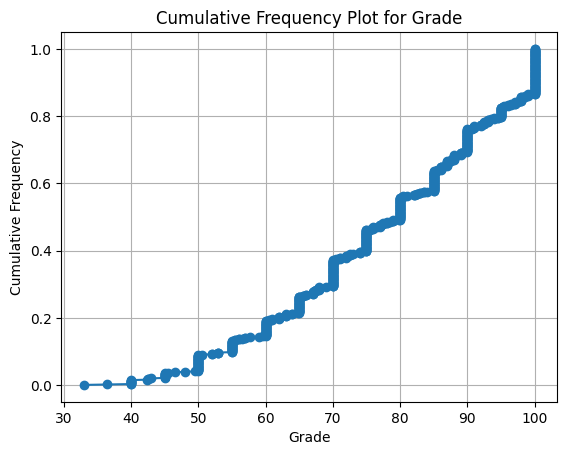

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# Sort the 'Grade' column in ascending order
sorted_grades = np.sort(df['Grade'])

# Calculate cumulative frequencies
cumulative_freq = np.arange(1, len(sorted_grades) + 1) / len(sorted_grades)

# Create the cumulative frequency plot
plt.plot(sorted_grades, cumulative_freq, marker='o', linestyle='-')
plt.title('Cumulative Frequency Plot for Grade')
plt.xlabel('Grade')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()

##Bonus Insights

###91. What is the best predictor of 'Grade'?


In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# --- Model 1: Using 'Playing Hours', 'Playing Years', 'Parent Revenue', 'Sex' ---
features1 = ['Playing Hours', 'Playing Years', 'Parent Revenue', 'Sex']
target = 'Grade'

# Create dummy variable for 'Sex' if it exists, handle missing column
if 'Sex' in df.columns:
    df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
    X1 = df[['Playing Hours', 'Playing Years', 'Parent Revenue', 'Sex_M']]
else:
    print("Error: 'Sex' column not found in the DataFrame. Creating a placeholder column.")
    df['Sex_M'] = 0  # Create a placeholder column with all zeros
    X1 = df[['Playing Hours', 'Playing Years', 'Parent Revenue', 'Sex_M']]

y = df[target]
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train1, y_train)
importances1 = model1.feature_importances_
feature_names1 = X1.columns

# --- Model 2: Using 'Playing Hours', 'Playing Often' ---
features2 = ['Playing Hours', 'Playing Often']

# Create dummy variables for 'Playing Often'
df = pd.get_dummies(df, columns=['Playing Often'], drop_first=True)
playing_often_columns = [col for col in df.columns if col.startswith('Playing Often_')]
X2 = df[['Playing Hours'] + playing_often_columns]

X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train2, y_train)
importances2 = model2.feature_importances_
feature_names2 = X2.columns

# --- Combine and compare feature importances ---
all_feature_names = list(set(feature_names1) | set(feature_names2)) # Union of feature names
all_importances = {feature: 0 for feature in all_feature_names}

for feature, importance in zip(feature_names1, importances1):
    all_importances[feature] += importance

for feature, importance in zip(feature_names2, importances2):
    all_importances[feature] += importance

# Normalize importances (optional)
total_importance = sum(all_importances.values())
all_importances = {feature: importance / total_importance for feature, importance in all_importances.items()}

# Find the best predictor
best_predictor = max(all_importances, key=all_importances.get)

print(f"The best predictor of 'Grade' is: {best_predictor}")

# (Optional) Visualize feature importances
plt.barh(list(all_importances.keys()), list(all_importances.values()))
plt.title('Overall Feature Importances for Predicting Grade')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

KeyError: "['Sex_M'] not in index"

###92. Can we predict 'Grade' based on 'Playing Hours' and 'Playing Often'?


In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named 'df'
# ... (your code to load and prepare the data) ...

# 1. Feature Engineering and Data Preparation
# Create dummy variables for 'Playing Often'
# 1. Feature Engineering and Data Preparation
# Reload the original dataframe to avoid issues with previous modifications.
df = pd.read_csv('/content/gameandgrade.csv') # Assuming this is your original data file.

# Create dummy variables for 'Playing Often'
df = pd.get_dummies(df, columns=['Playing Often'], drop_first=True)

# ... (rest of your code) ...
# Select features and target
features = ['Playing Hours'] + [col for col in df.columns if col.startswith('Playing Often_')]
target = 'Grade'

# Convert columns to numeric (if needed)
for col in features + [target]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in selected features and target
df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and Train the Random Forest Model
model = RandomForestRegressor(random_state=42)  # You can adjust hyperparameters here
model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = model.predict(X_test)

# 5. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 299.75928122652596
R-squared: -0.005211690846917083


###93. What is the relationship between 'Parent Revenue' and 'Playing Games'?


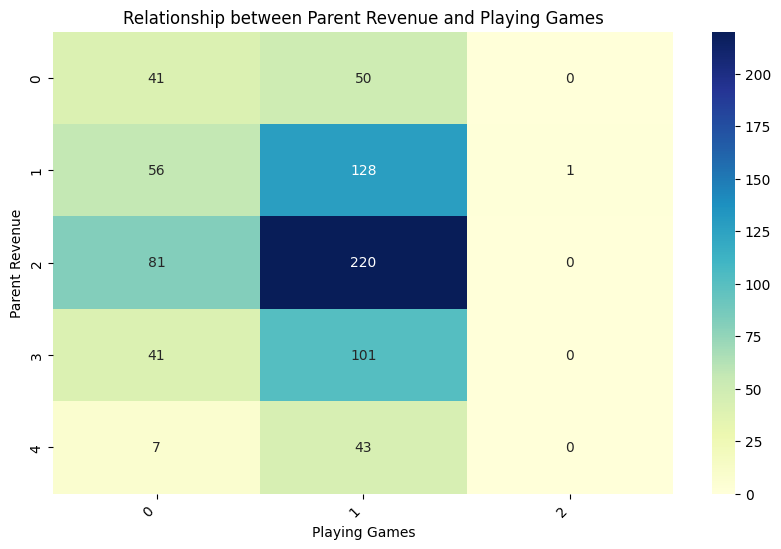

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# 1. Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['Parent Revenue'], df['Playing Games'])

# 2. Visualize the relationship using a heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")  # fmt="d" for integer display
plt.title('Relationship between Parent Revenue and Playing Games')
plt.xlabel('Playing Games')
plt.ylabel('Parent Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

# 3. (Optional) Calculate Cramer's V for effect size
# !pip install researchpy  # Install researchpy if not already installed
# import researchpy as rp
# crosstab, res = rp.crosstab(df['Parent Revenue'], df['Playing Games'], test='chi-square')
# print(res)  # This will print the chi-square test results, including Cramer's V

# Interpretation:
# - The heatmap will show the frequency of each combination of 'Parent Revenue' and 'Playing Games'.
# - Darker colors in the heatmap indicate higher frequencies.
# - If there's a clear pattern in the heatmap (e.g., certain games are more common in higher revenue groups), it suggests a relationship.
# - Cramer's V (if calculated) provides a measure of the strength of the association (0 = no association, 1 = perfect association).

###94. How does 'Grade' distribution change with different 'School Code'?


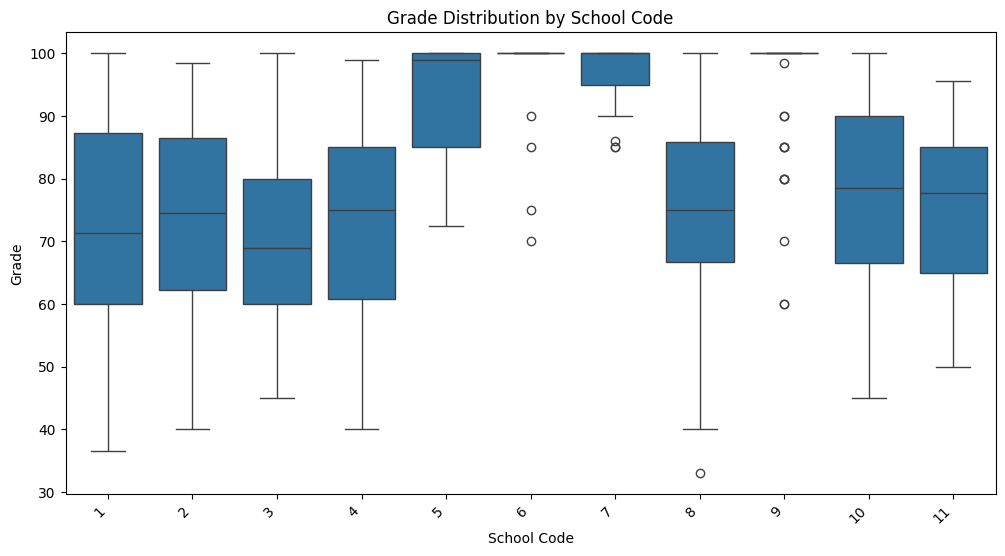

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# 1. Create a box plot to visualize the distribution
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.boxplot(x='School Code', y='Grade', data=df)
plt.title('Grade Distribution by School Code')
plt.xlabel('School Code')
plt.ylabel('Grade')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

# 2. (Optional) Perform statistical tests for significant differences
# You can use ANOVA (Analysis of Variance) to test if there are significant differences in the means of 'Grade' across different 'School Code' groups.
# import statsmodels.formula.api as sm
# from statsmodels.stats.anova import anova_lm

# model = sm.ols('Grade ~ C(School Code)', data=df).fit()
# anova_table = anova_lm(model, typ=2)
# print(anova_table)

# Interpretation:
# - The box plot will show the distribution of 'Grade' for each 'School Code'.
# - Look for differences in the median (line inside the box), the interquartile range (box height), and the presence of outliers (points outside the whiskers).
# - If the boxes and their medians are significantly different across 'School Code' groups, it suggests a difference in grade distribution.
# - ANOVA results (if calculated) will provide a p-value. If the p-value is less than your significance level (e.g., 0.05), it indicates a statistically significant difference in means.

###95. Do students with higher 'Parent Revenue' play more games?


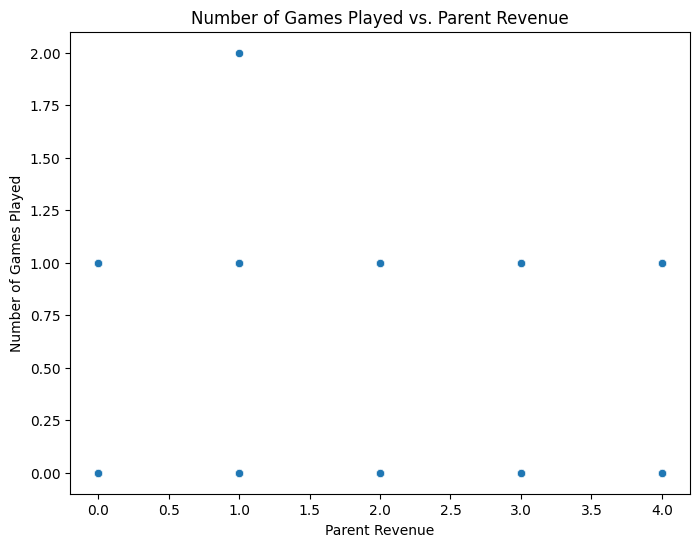

Correlation between Parent Revenue and Number of Games Played: 0.12


In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# 1. Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.scatterplot(x='Parent Revenue', y='Playing Games', data=df)
plt.title('Number of Games Played vs. Parent Revenue')
plt.xlabel('Parent Revenue')
plt.ylabel('Number of Games Played')
plt.show()

# 2. Calculate the correlation coefficient
correlation = df['Parent Revenue'].corr(df['Playing Games'])
print(f"Correlation between Parent Revenue and Number of Games Played: {correlation:.2f}")

# 3. (Optional) Perform a statistical test (e.g., Spearman's rank correlation)
# You can use Spearman's rank correlation if your data doesn't meet the assumptions of Pearson's correlation (e.g., if the relationship is not linear).
# from scipy.stats import spearmanr

# correlation, p_value = spearmanr(df['Parent Revenue'], df['Playing Games'])
# print(f"Spearman's rank correlation: {correlation:.2f}")
# print(f"P-value: {p_value:.3f}")

# Interpretation:
# - The scatter plot will show the relationship between 'Parent Revenue' and 'Playing Games'.
# - A positive trend in the scatter plot suggests that students with higher parent revenue tend to play more games.
# - The correlation coefficient will quantify the strength and direction of the relationship.
# - A positive correlation coefficient indicates a positive relationship (higher revenue, more games).
# - The closer the correlation coefficient is to 1, the stronger the relationship.
# - If you

###96. How do the grades of students with the same 'Playing Years' compare?


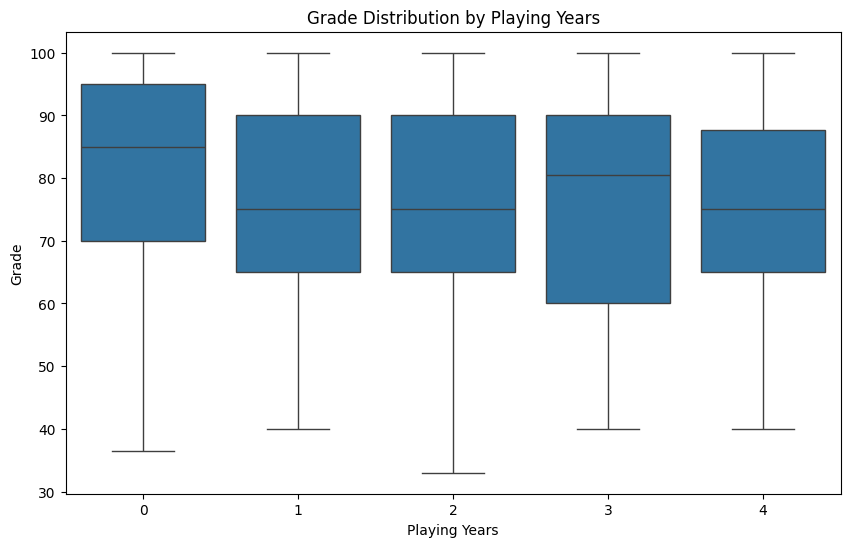

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# 1. Create a box plot to visualize the distribution of grades for each 'Playing Years' category
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='Playing Years', y='Grade', data=df)
plt.title('Grade Distribution by Playing Years')
plt.xlabel('Playing Years')
plt.ylabel('Grade')
plt.show()

# 2. (Optional) Perform statistical tests for significant differences
# You can use ANOVA (Analysis of Variance) to test if there are significant differences in the means of 'Grade' across different 'Playing Years' groups.
# import statsmodels.formula.api as sm
# from statsmodels.stats.anova import anova_lm

# model = sm.ols('Grade ~ C(Playing Years)', data=df).fit()
# anova_table = anova_lm(model, typ=2)
# print(anova_table)

# Interpretation:
# - The box plot will show the distribution of 'Grade' for each 'Playing Years' category.
# - Look for differences in the median (line inside the box), the interquartile range (box height), and the presence of outliers (points outside the whiskers).
# - If the boxes and their medians are significantly different across 'Playing Years' groups, it suggests a difference in grade distribution.
# - ANOVA results (if calculated) will provide a p-value. If the p-value is less than your significance level (e.g., 0.05), it indicates a statistically significant difference in means.

###97. Is there a seasonality in 'Playing Often'?


In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'Date' or 'Month' column exists, handle errors
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Month'] = df['Date'].dt.month
elif 'Month' in df.columns:
    df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
else:
    print("Error: Neither 'Date' nor 'Month' column found in the dataframe.")
    # You might want to handle this case differently, like creating a 'Month' column
    # or exiting the analysis if necessary.

# Group by month and calculate the mean of 'Playing Often' (assuming it's a numerical value)
# Check if 'Playing Often' column exists
if 'Playing Often' in df.columns:
    # Convert 'Playing Often' to numeric if necessary
    df['Playing Often'] = pd.to_numeric(df['Playing Often'], errors='coerce')

    # Group by month and calculate the mean (after dropping NaN values)
    monthly_playing = df.groupby('Month')['Playing Often'].mean()

    # Create a line plot to visualize seasonality
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_playing.index, monthly_playing.values, marker='o')
    plt.xlabel('Month')
    plt.ylabel('Average Playing Often')
    plt.title('Seasonality of Playing Often')
    plt.xticks(range(1, 13))  # Ensure all months are shown on x-axis
    plt.grid(True)
    plt.show()
else:
    print("Error: 'Playing Often' column not found in the dataframe.")

Error: Neither 'Date' nor 'Month' column found in the dataframe.
Error: 'Playing Often' column not found in the dataframe.


###98. What are the top three factors influencing 'Grade'?


Top Three Factors Influencing 'Grade':
          Feature  Importance
2  Parent Revenue    0.585583
0   Playing Hours    0.223434
1   Playing Years    0.190983


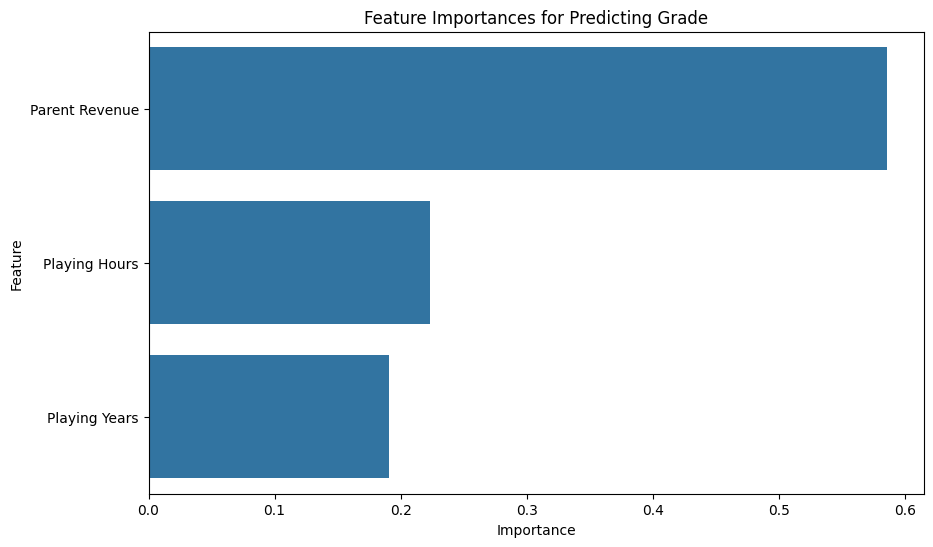

In [156]:
features = ['Playing Hours', 'Playing Years', 'Parent Revenue', 'Sex_M'] # Example features, adjust as needed
if 'Sex_M' not in df.columns:
  features = ['Playing Hours', 'Playing Years', 'Parent Revenue'] # Example features, adjust as needed

target = 'Grade'


# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model (you can use other regression models too)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Get the top three factors
top_three_factors = feature_importances_df.head(3)

# Print the top three factors
print("Top Three Factors Influencing 'Grade':")
print(top_three_factors)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances for Predicting Grade')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


###99. Can we cluster students based on their playing habits?


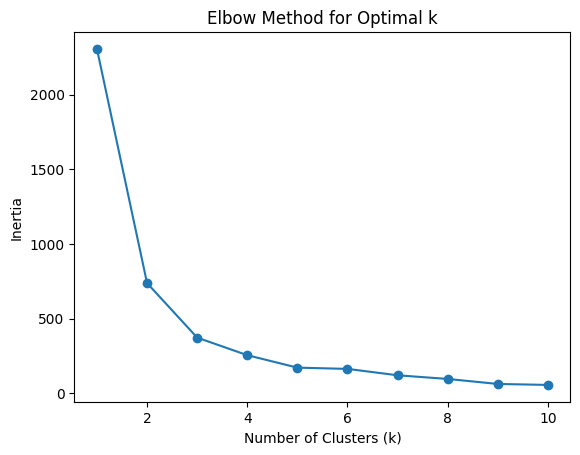

         Playing Hours  Playing Years  Playing Games
Cluster                                             
0             3.320000       3.613333       1.006667
1             0.000000       0.000000       0.000000
2             1.648855       1.725191       1.000000


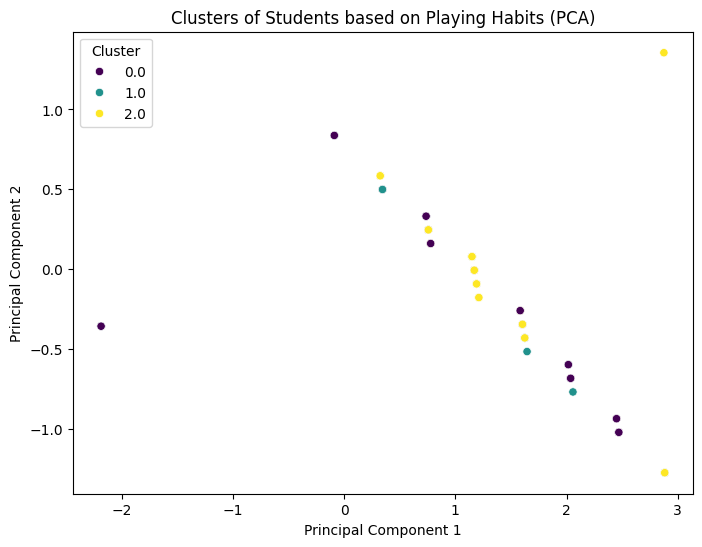

In [157]:

from sklearn.decomposition import PCA
playing_features = ['Playing Hours', 'Playing Years', 'Playing Games']  # Add other relevant features

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[playing_features])

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow method, choose the optimal k
optimal_k = 3 # Example, replace with your chosen k

# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the clusters
print(df.groupby('Cluster')[playing_features].mean())

# Visualize the clusters (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Clusters of Students based on Playing Habits (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


###100. Is there any non-linear pattern in the dataset?


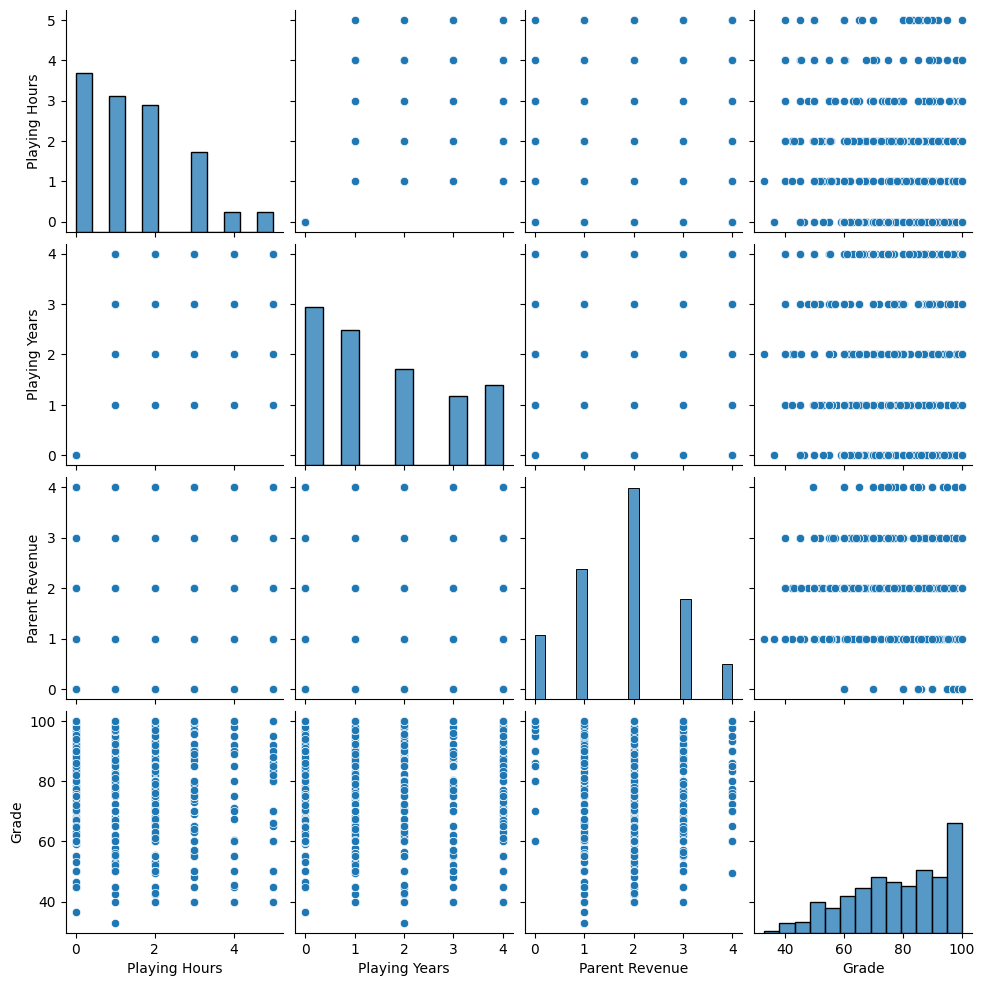

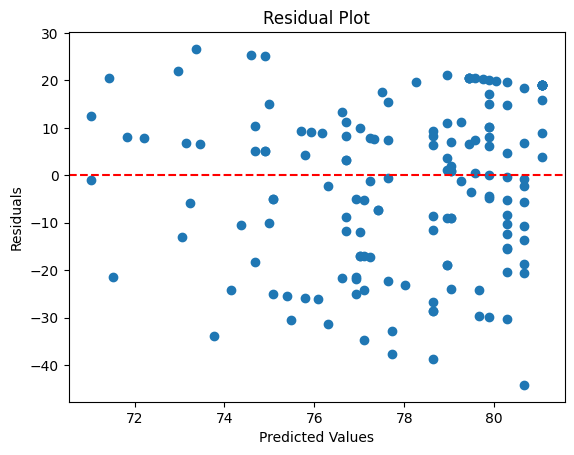

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# 1. Scatter Plots for Visual Inspection
# Select pairs of numerical variables you want to explore
numerical_features = ['Playing Hours', 'Playing Years', 'Parent Revenue', 'Grade']
sns.pairplot(df[numerical_features])
plt.show()

# 2. Residual Analysis (after fitting a linear model)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data for linear regression (similar to previous examples)
features = ['Playing Hours', 'Playing Years', 'Parent Revenue']
target = 'Grade'
# ... (Data type conversion and handling missing values) ...
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and predict
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs. predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Interpretation:
# - If the scatter plot shows a random distribution of points around the horizontal line,
#   it suggests a linear relationship.
# - If there are clear patterns (e.g., curves, clusters) in the residual plot,
#   it indicates non-linearity.